In [4]:
# Importing necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [5]:
application_df = pd.read_csv("walmart_cleaned.csv")
application_df.head()
# Group the data by Store
grouped_data = application_df.groupby('Store')

# Create a dictionary to store data for each store
store_data = {}

# Loop through each store and store the data in the dictionary
for store_number, data in grouped_data:
    store_data[store_number] = data.drop(['Store', 'Date'], axis=1)

In [6]:
#Perform Principal Component Analysis for each store on the feature variables.

In [8]:
from sklearn.decomposition import PCA

# Create a dictionary to store PCA results for each store
pca_results = {}

# Loop through each store and apply PCA
for store_number, data in store_data.items():
    # Separate features (X) and target (y)
    X = data.drop('Weekly_Sales', axis=1)
    y = data['Weekly_Sales']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA
    pca = PCA(n_components=2)  # Choose the number of components you want to keep
    principal_components = pca.fit_transform(X_scaled)

    # Store PCA results in the dictionary
    pca_results[store_number] = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_results[store_number]['Weekly_Sales'] = y.values


In [ ]:
#PCA on the data for all 45 stores, and we have the first two principal components and the corresponding weekly sales for each store.

In [ ]:
#Scatter Plot of Principal Components: Visualize the first two principal components on a scatter plot, coloring the points by store or by the presence of a holiday. This gives an overview of how the data points from different stores are distributed in the reduced feature space.

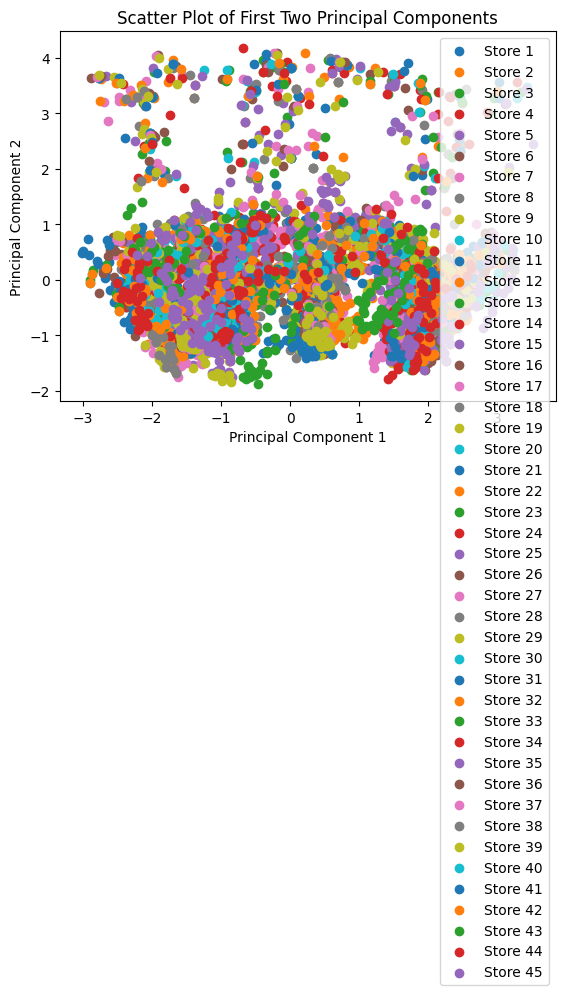

In [9]:
import matplotlib.pyplot as plt

# Plot scatter plot for each store
for store_number, data in pca_results.items():
    plt.scatter(data['PC1'], data['PC2'], label=f"Store {store_number}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Scatter Plot of First Two Principal Components')
plt.show()


In [ ]:
#Explained Variance Ratio: Compute and plot the explained variance ratio for each principal component. This helps understand how much information each principal component captures.

In [10]:
# Calculate explained variance ratio
for store_number, data in pca_results.items():
    pca = PCA(n_components=data.shape[1]-1)
    pca.fit(data.drop('Weekly_Sales', axis=1))
    explained_variance = pca.explained_variance_ratio_
    print(f"Store {store_number} - Explained Variance Ratio:", explained_variance)


Store 1 - Explained Variance Ratio: [0.68336246 0.31663754]
Store 2 - Explained Variance Ratio: [0.69383462 0.30616538]
Store 3 - Explained Variance Ratio: [0.67876386 0.32123614]
Store 4 - Explained Variance Ratio: [0.70975966 0.29024034]
Store 5 - Explained Variance Ratio: [0.69319418 0.30680582]
Store 6 - Explained Variance Ratio: [0.69288691 0.30711309]
Store 7 - Explained Variance Ratio: [0.70925409 0.29074591]
Store 8 - Explained Variance Ratio: [0.67790349 0.32209651]
Store 9 - Explained Variance Ratio: [0.684559 0.315441]
Store 10 - Explained Variance Ratio: [0.70870503 0.29129497]
Store 11 - Explained Variance Ratio: [0.67561447 0.32438553]
Store 12 - Explained Variance Ratio: [0.70529345 0.29470655]
Store 13 - Explained Variance Ratio: [0.71229919 0.28770081]
Store 14 - Explained Variance Ratio: [0.66651375 0.33348625]
Store 15 - Explained Variance Ratio: [0.62673868 0.37326132]
Store 16 - Explained Variance Ratio: [0.71265857 0.28734143]
Store 17 - Explained Variance Ratio: 

In [ ]:
#Correlation Heatmap: Created a correlation heatmap to visualize the correlations between the original features. This helps understand which features have the most influence on the principal components and how they relate to each other.

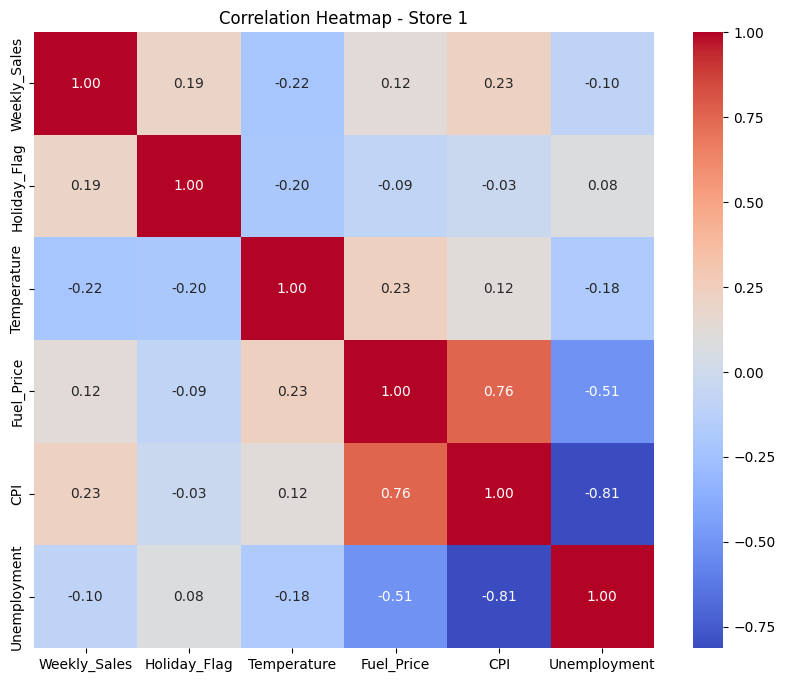

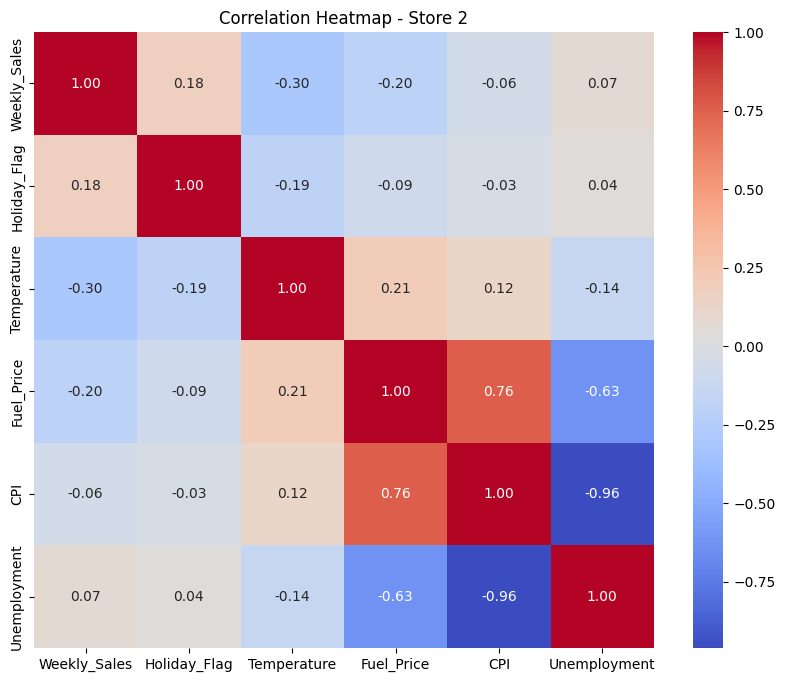

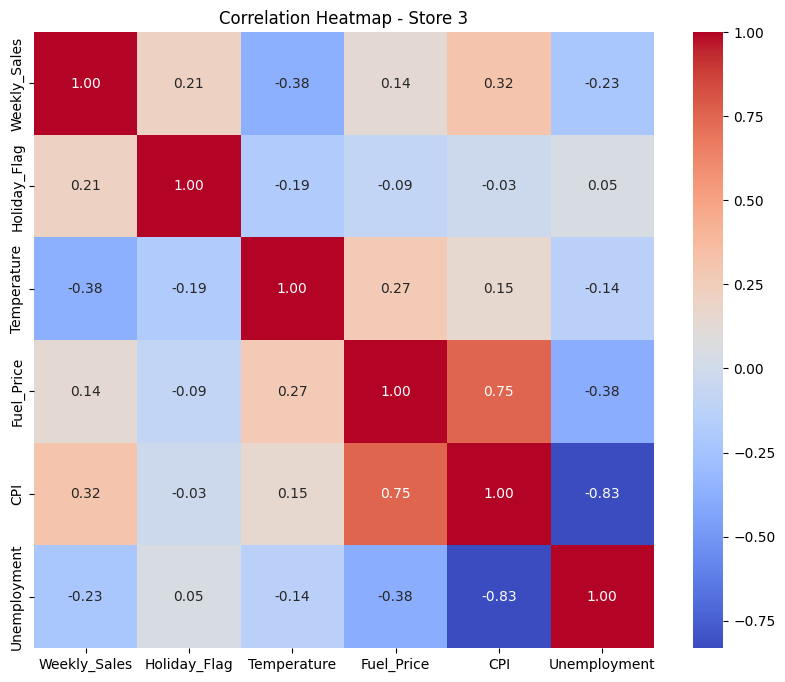

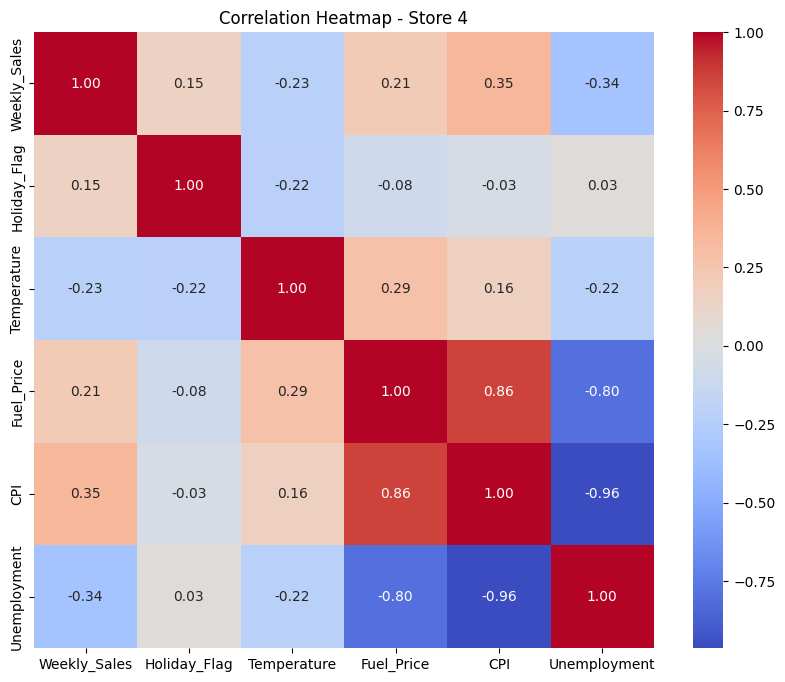

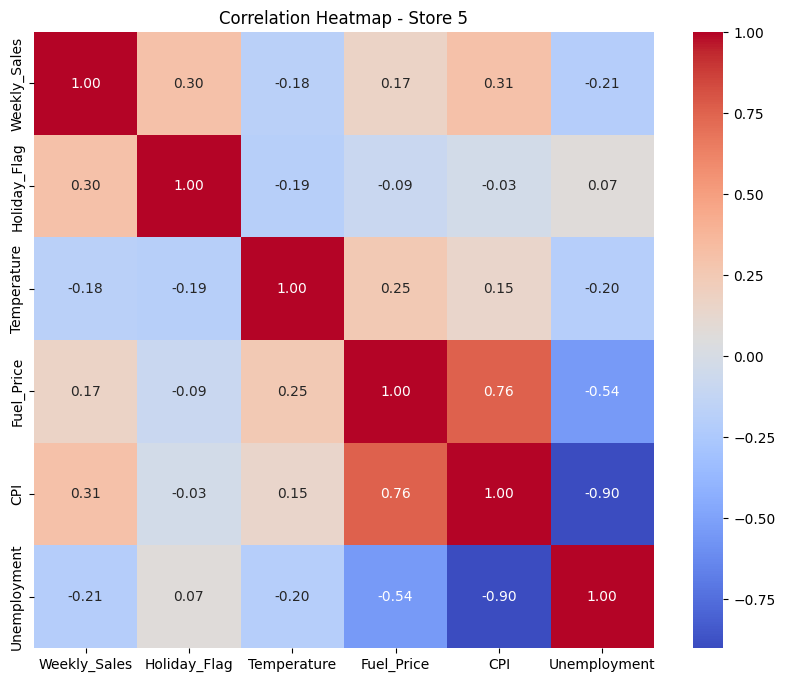

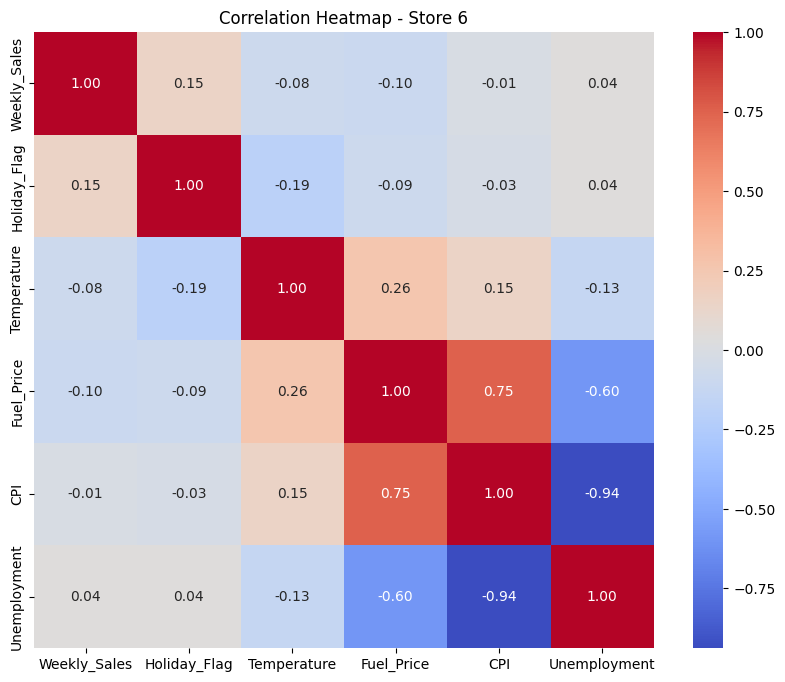

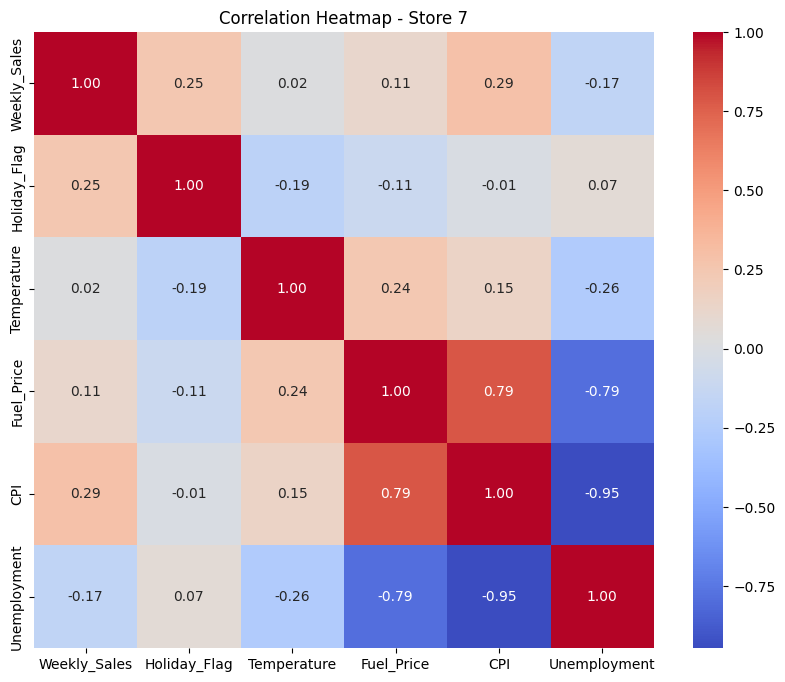

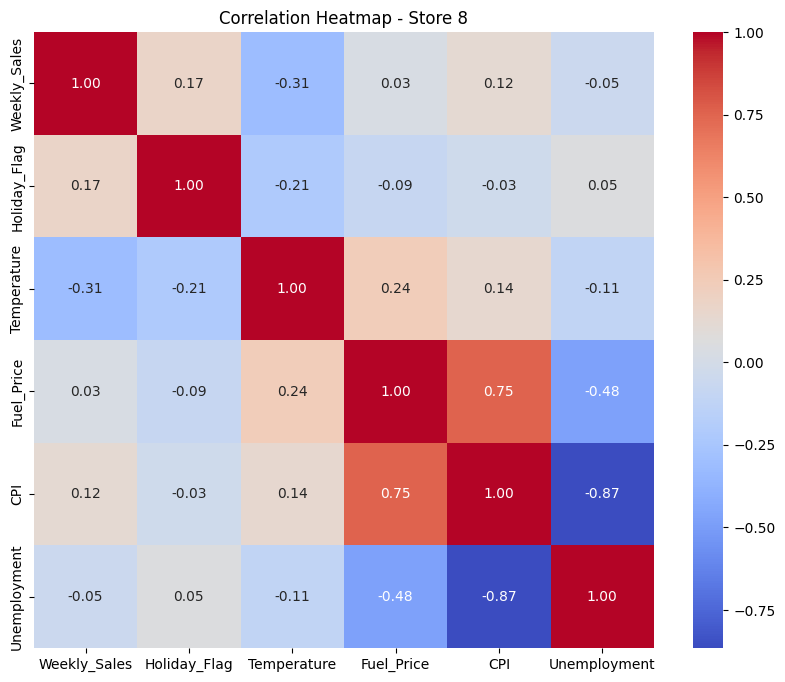

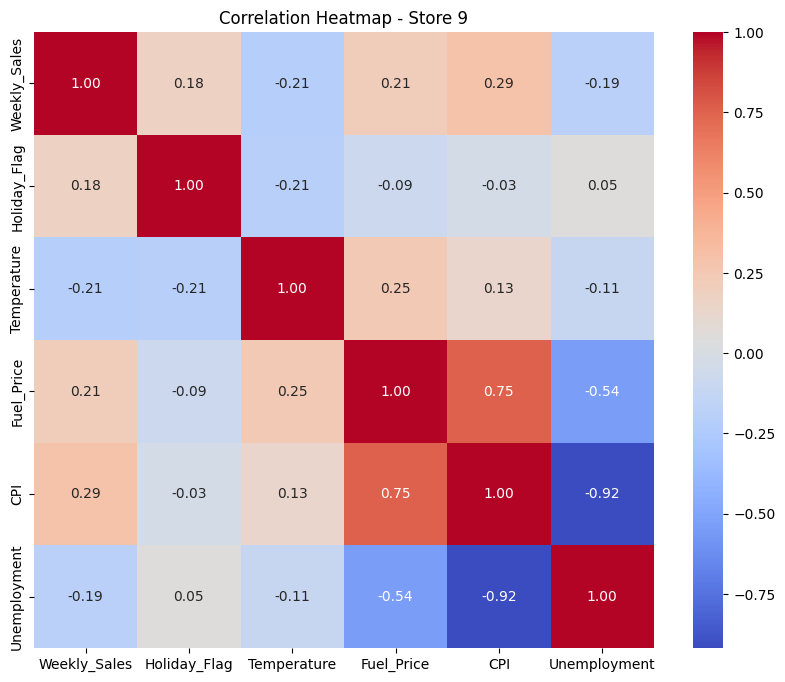

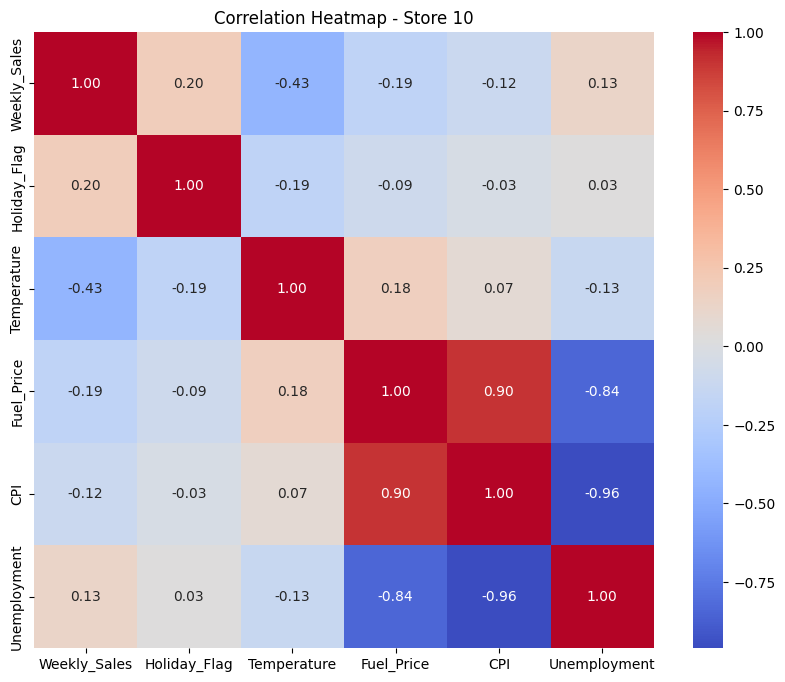

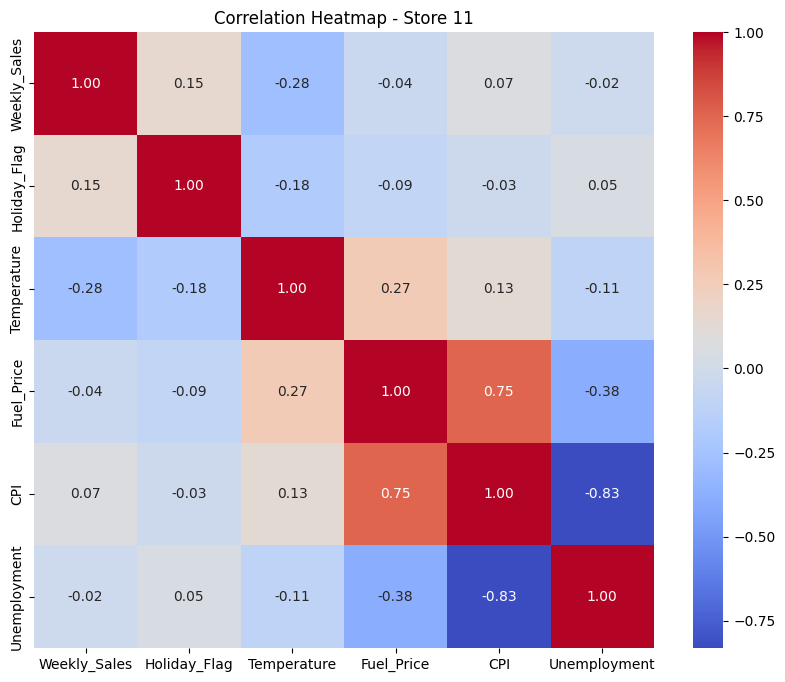

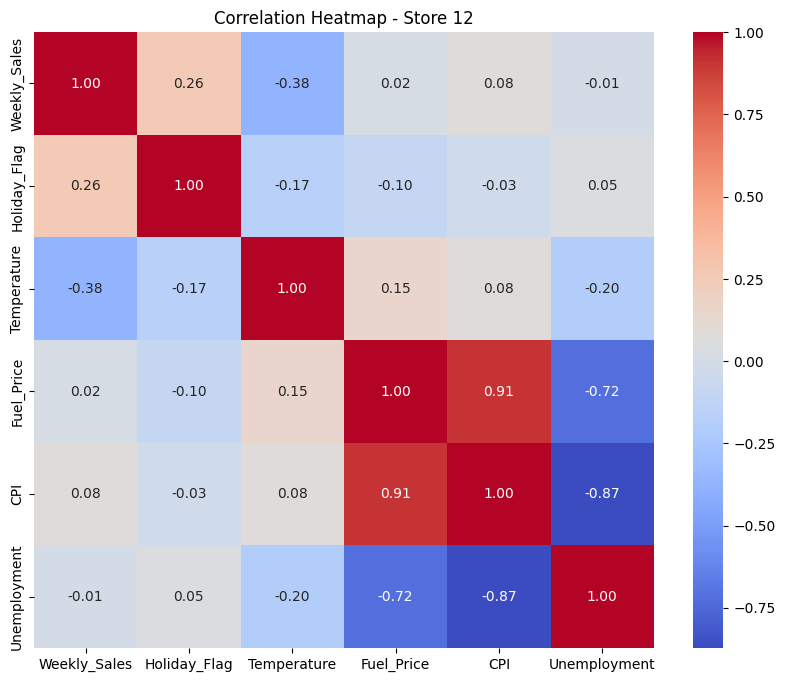

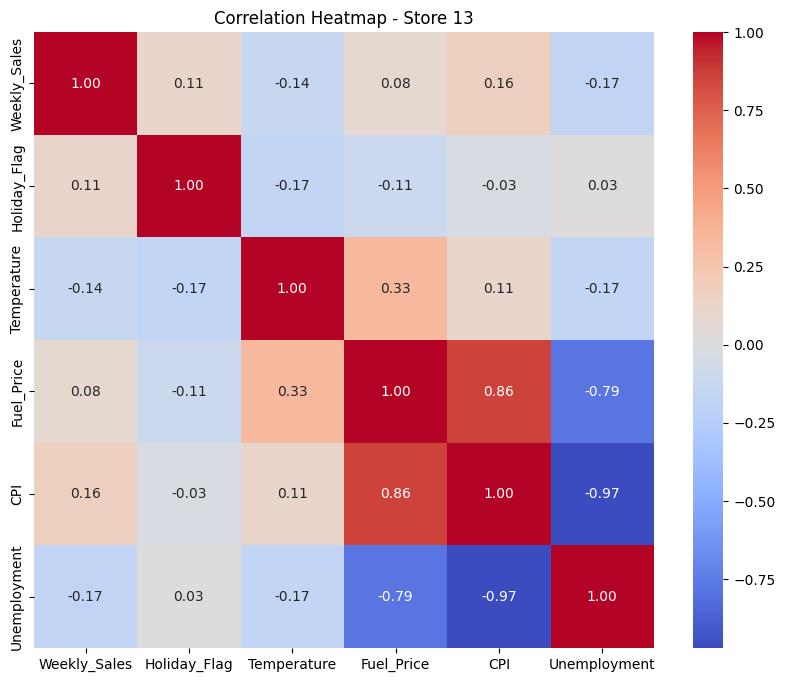

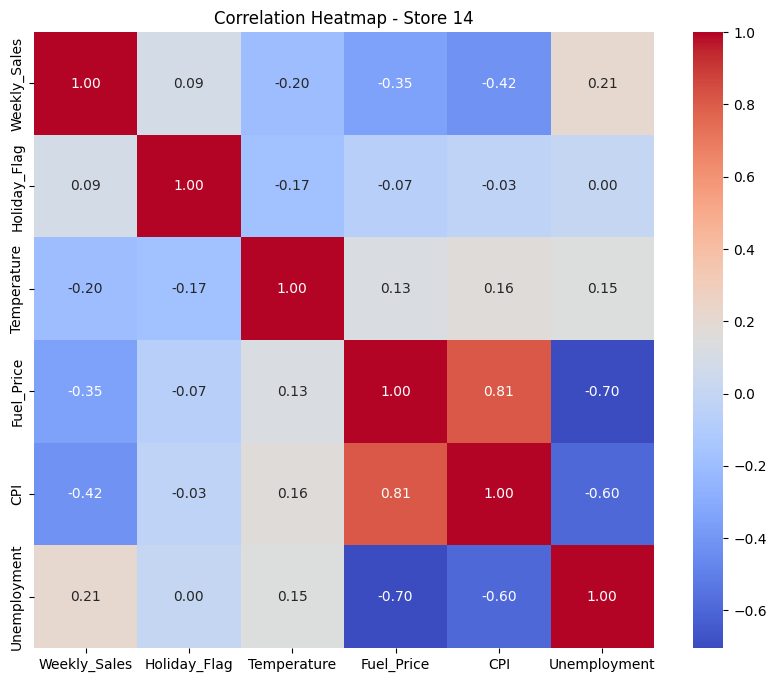

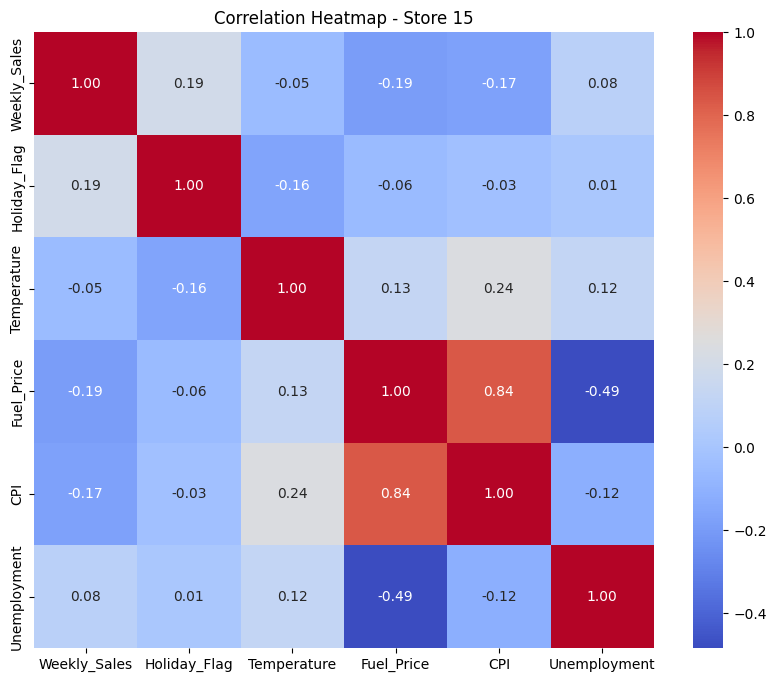

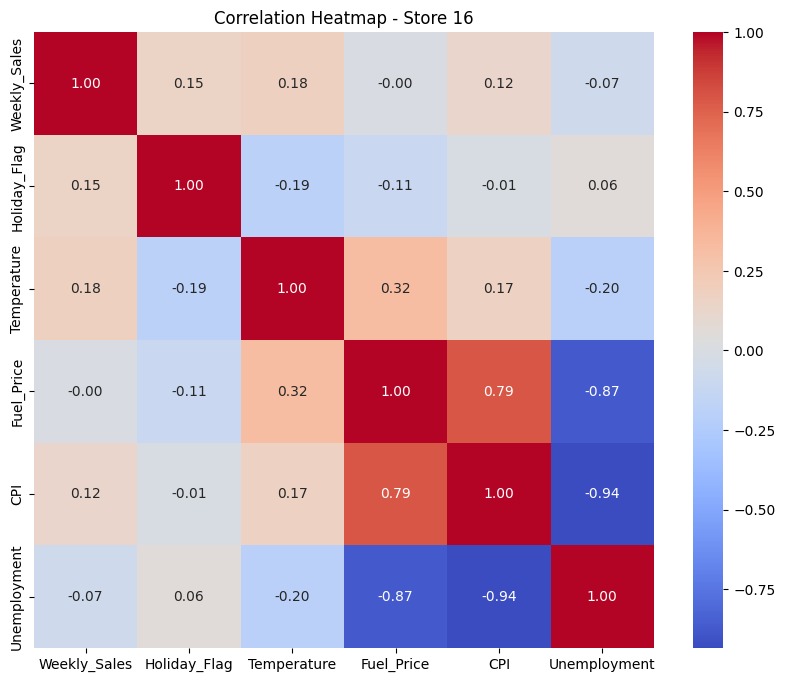

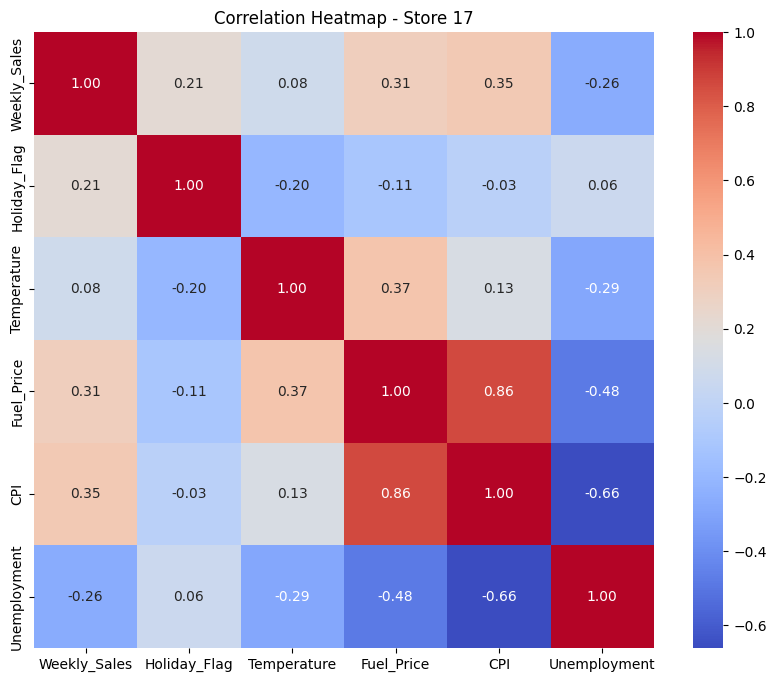

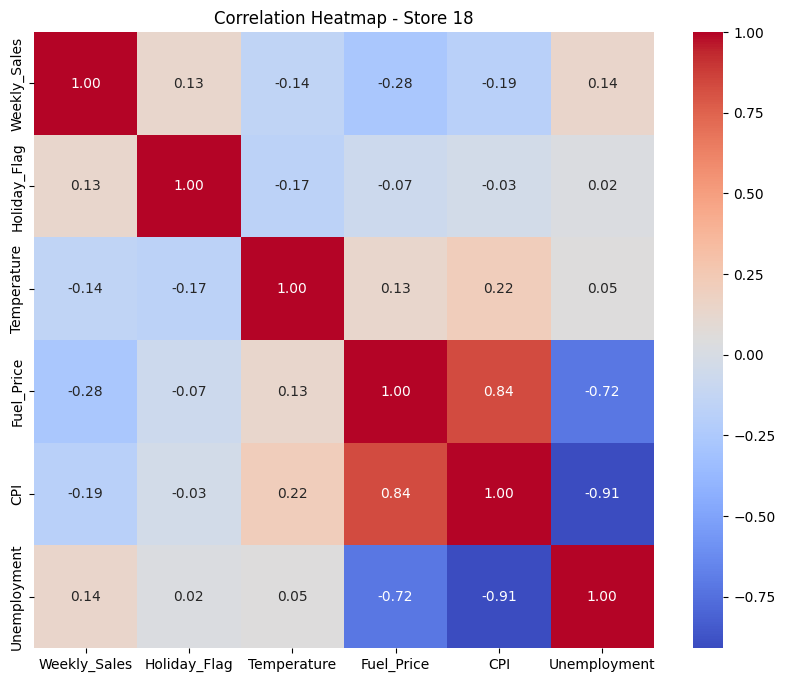

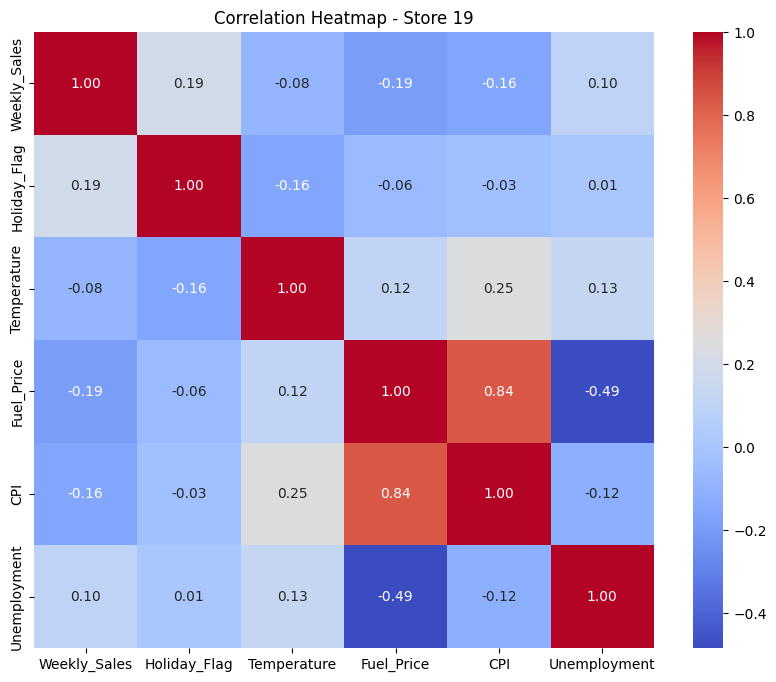

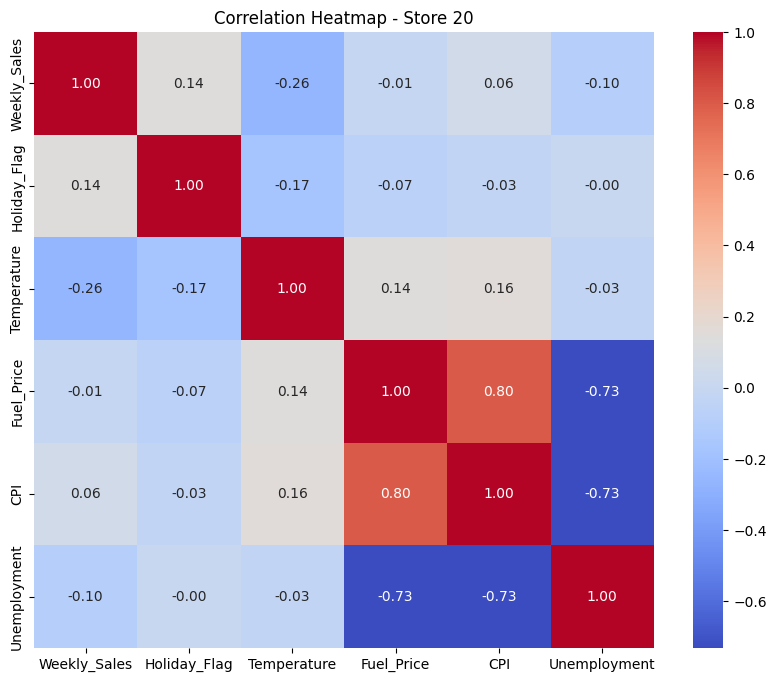

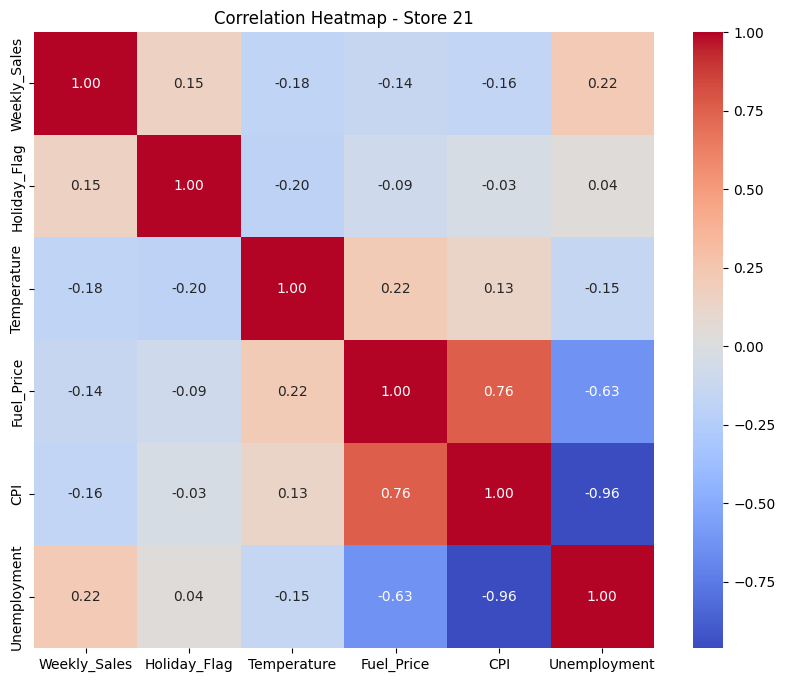

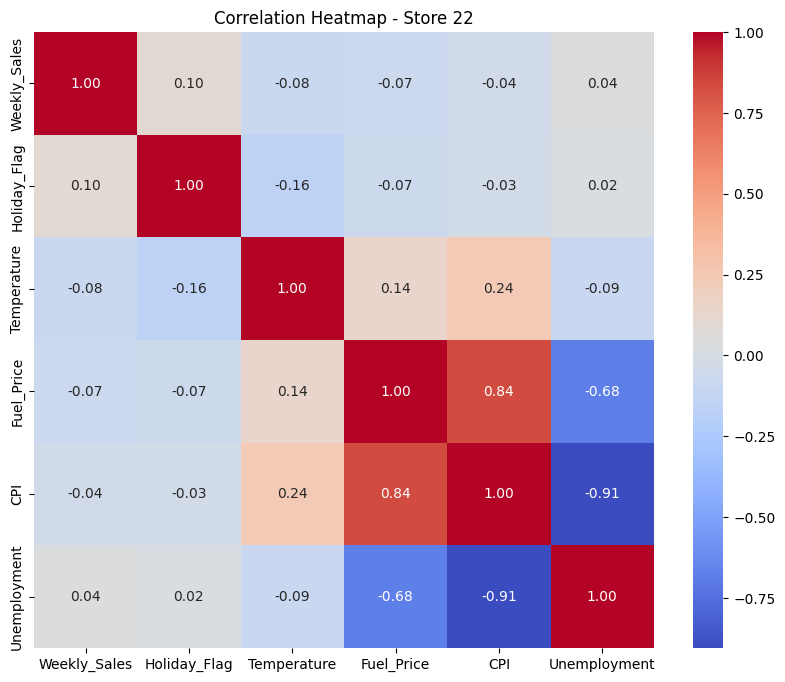

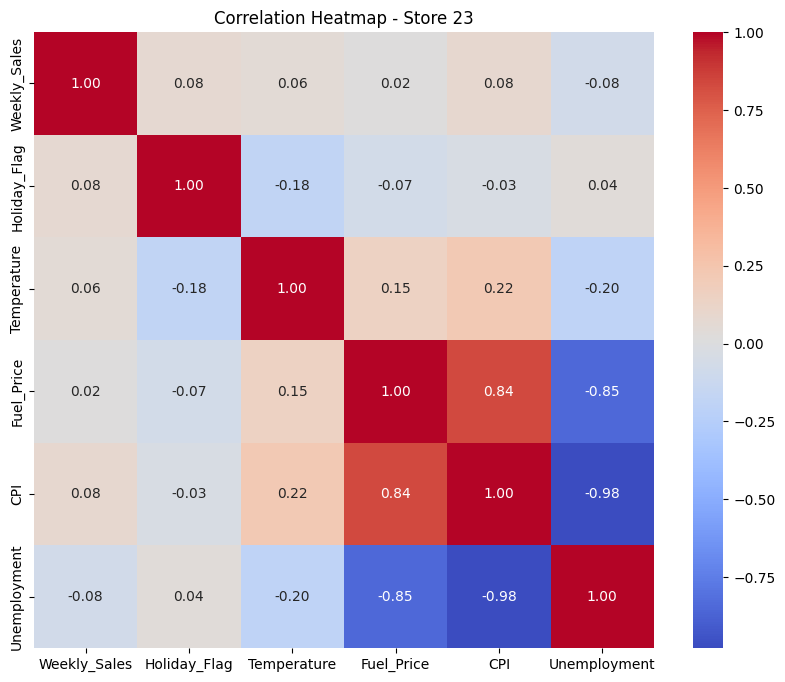

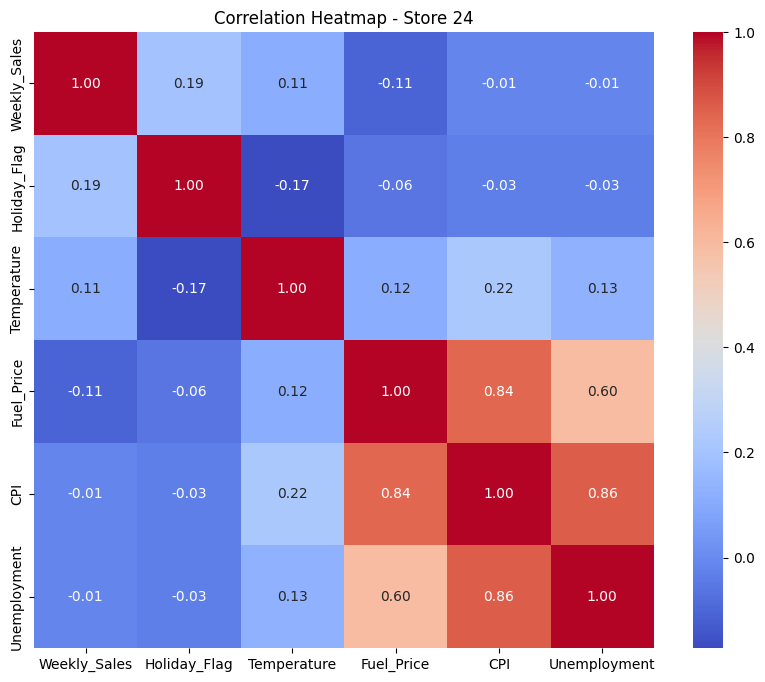

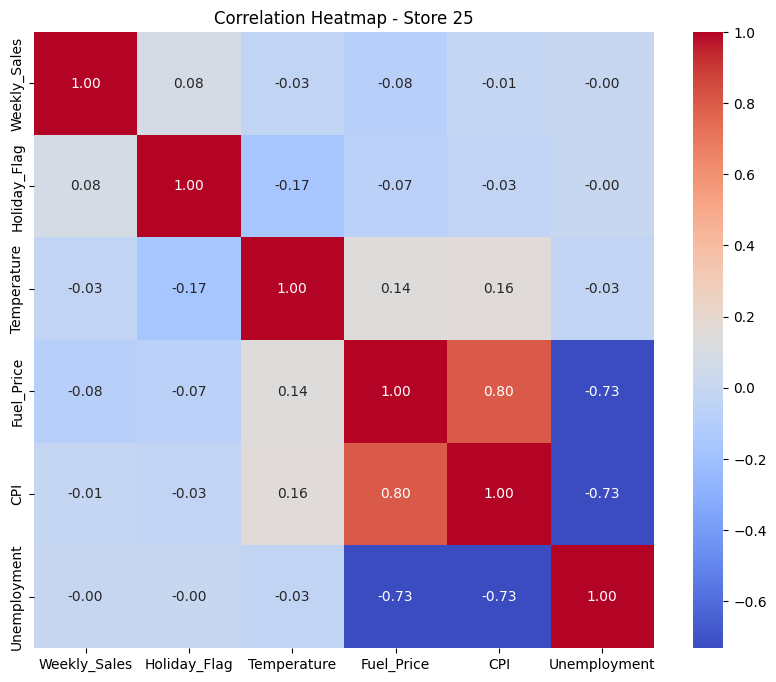

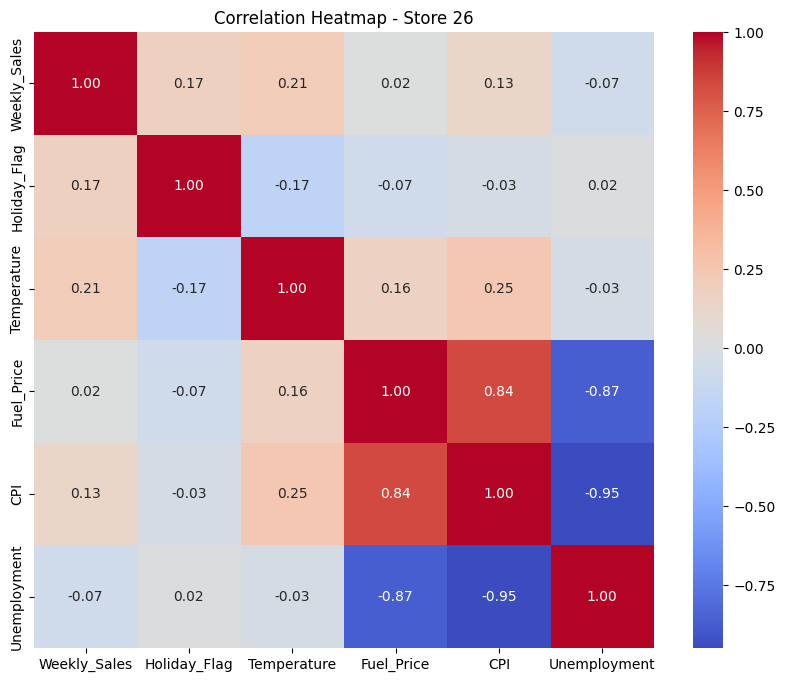

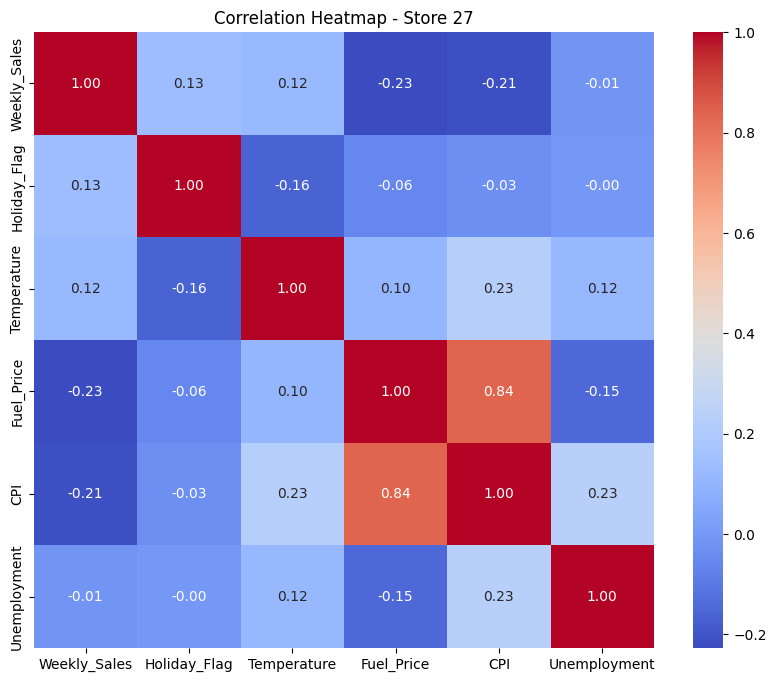

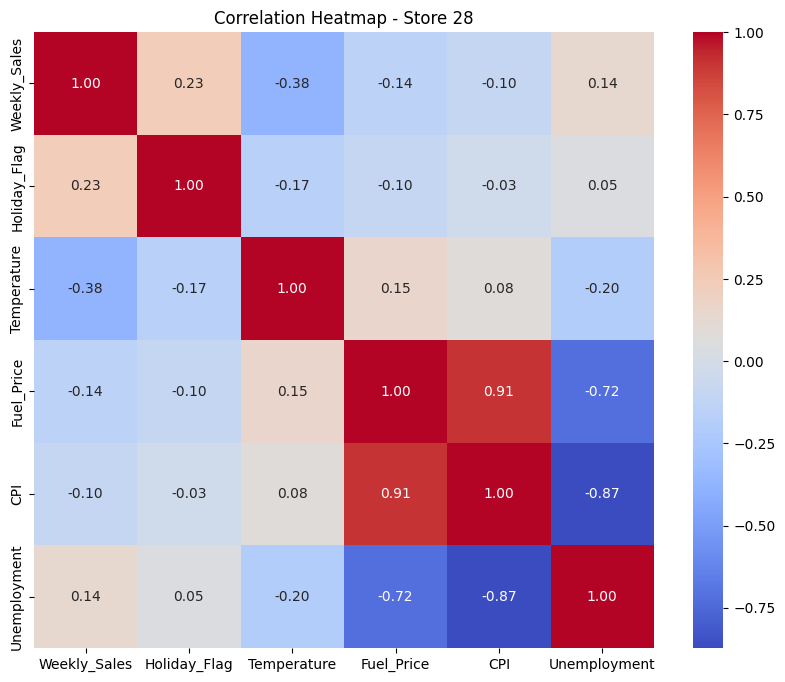

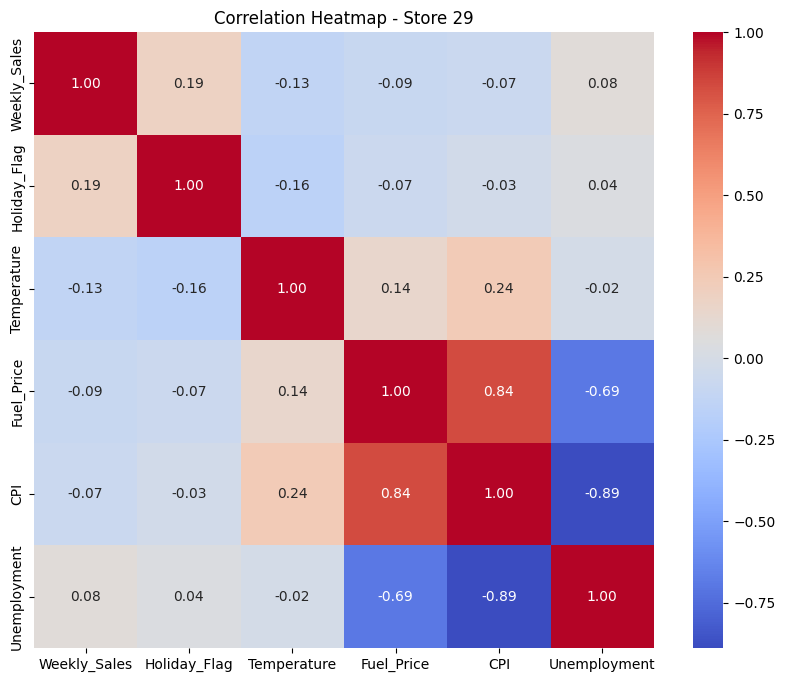

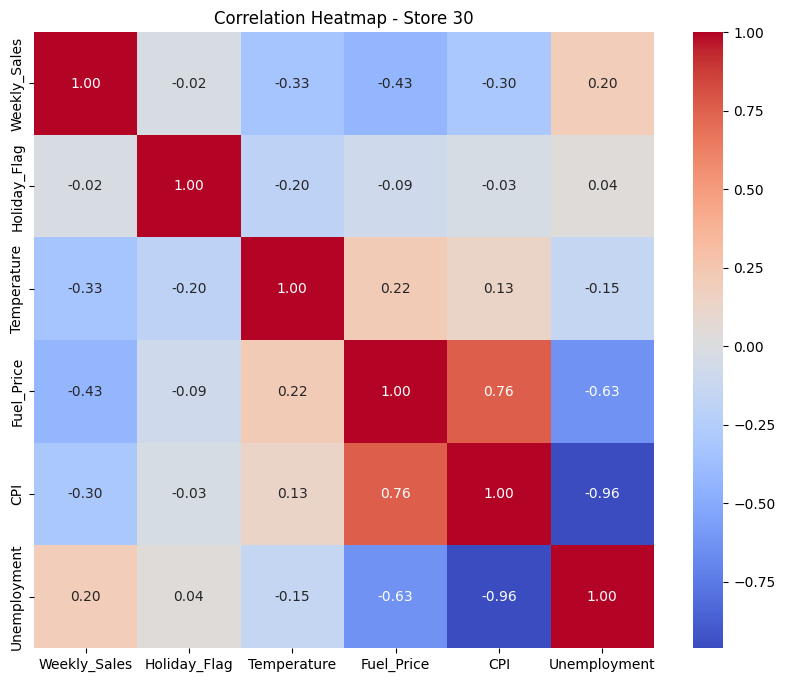

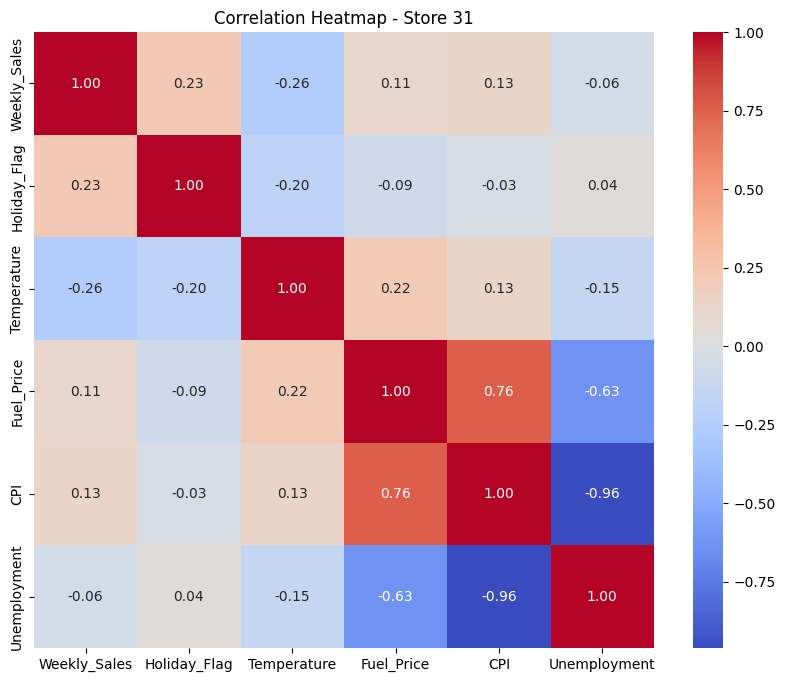

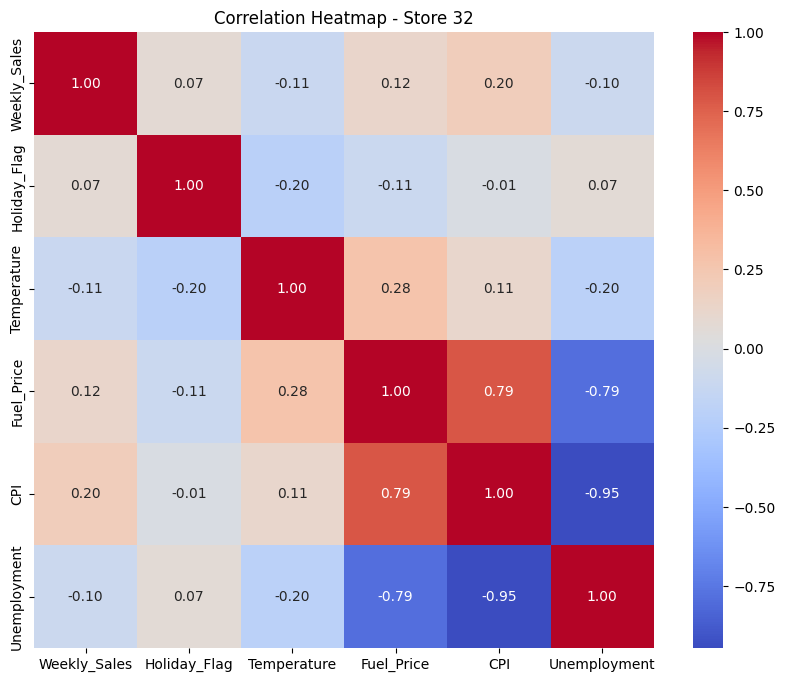

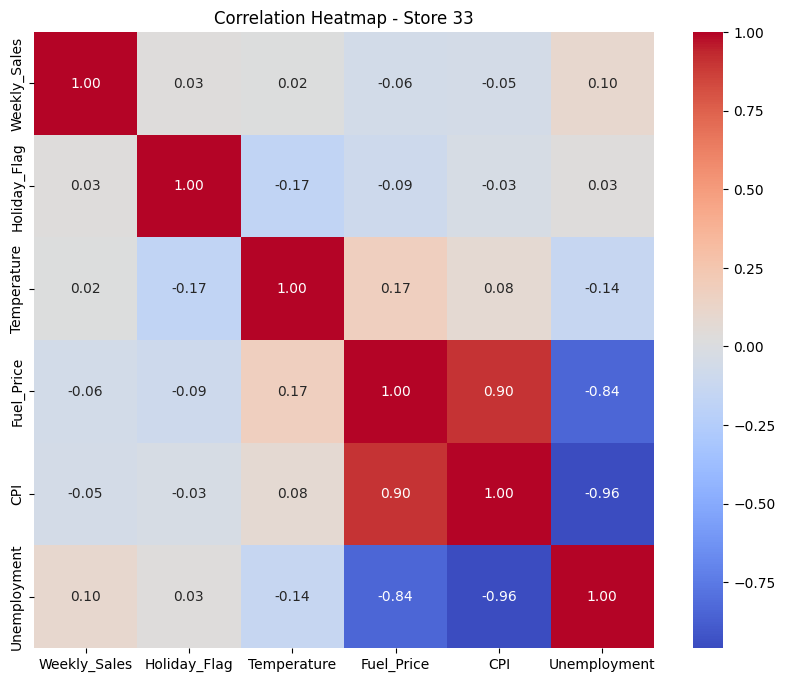

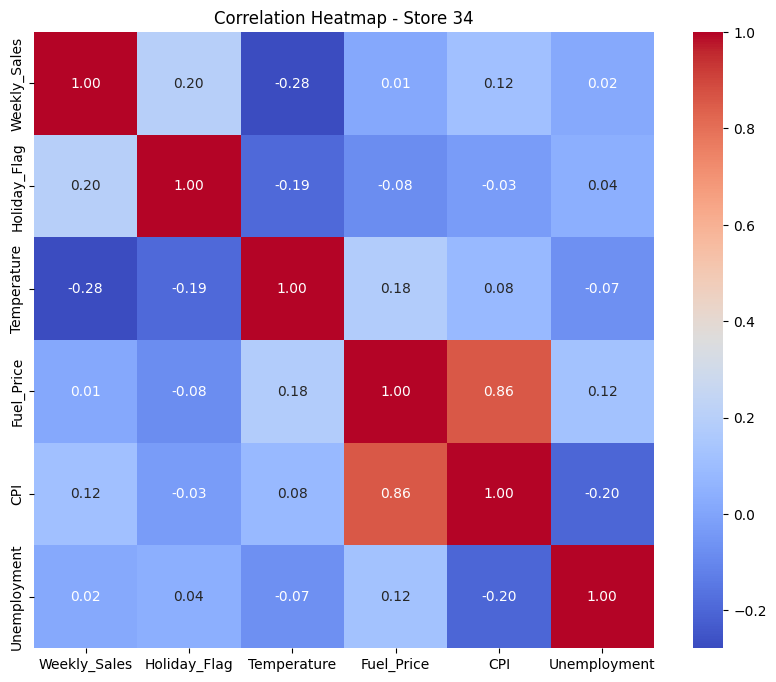

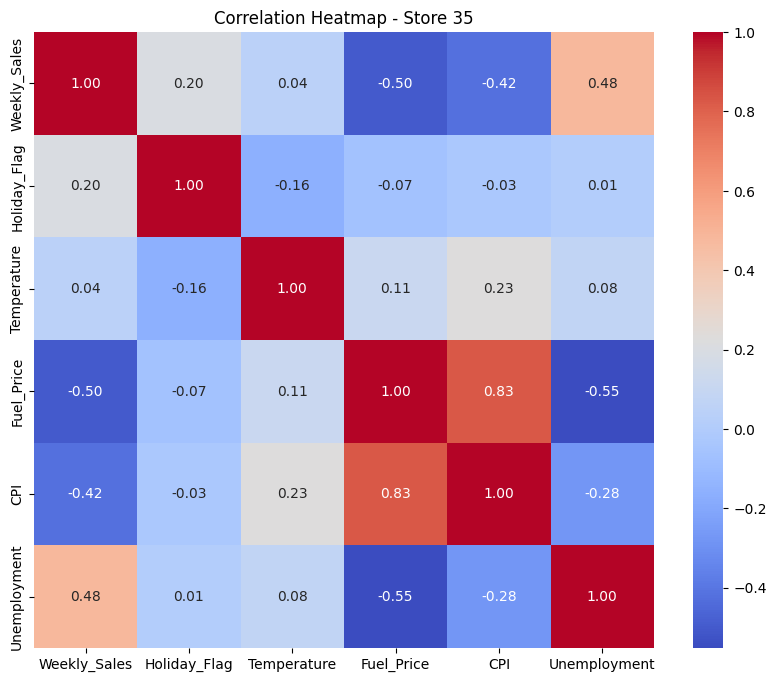

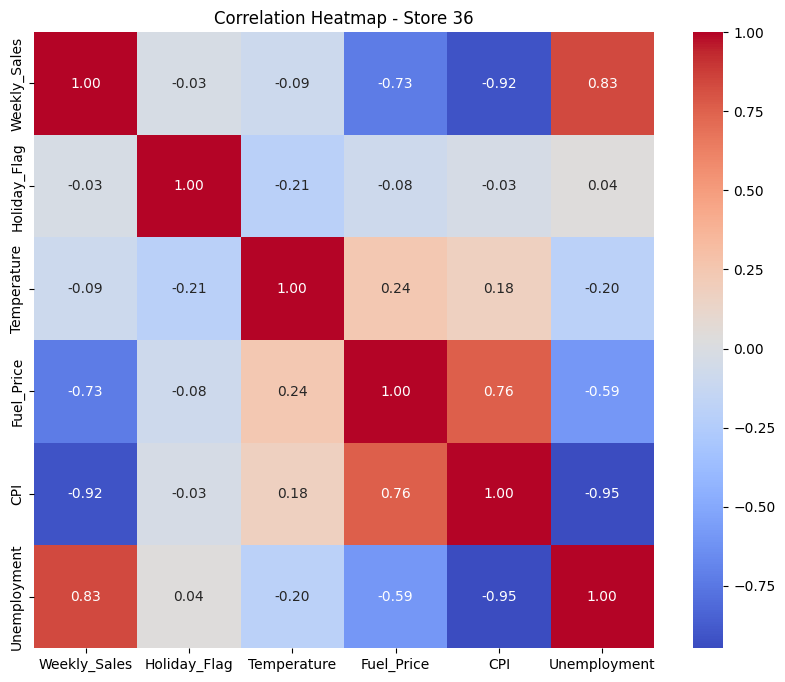

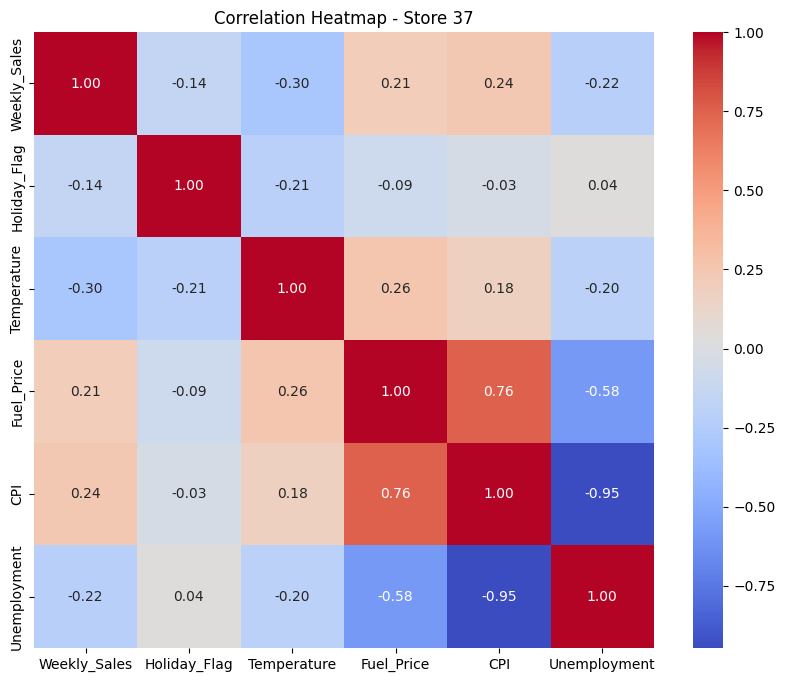

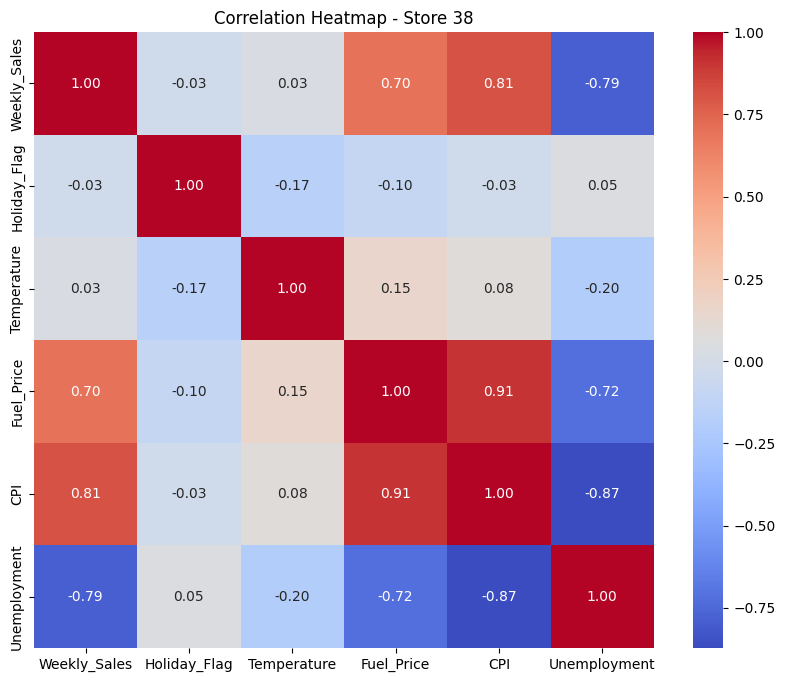

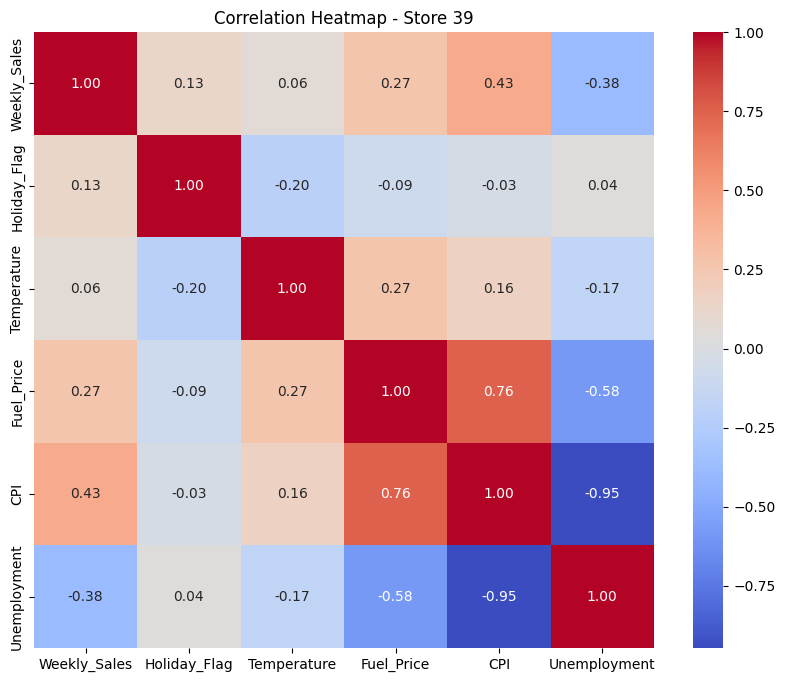

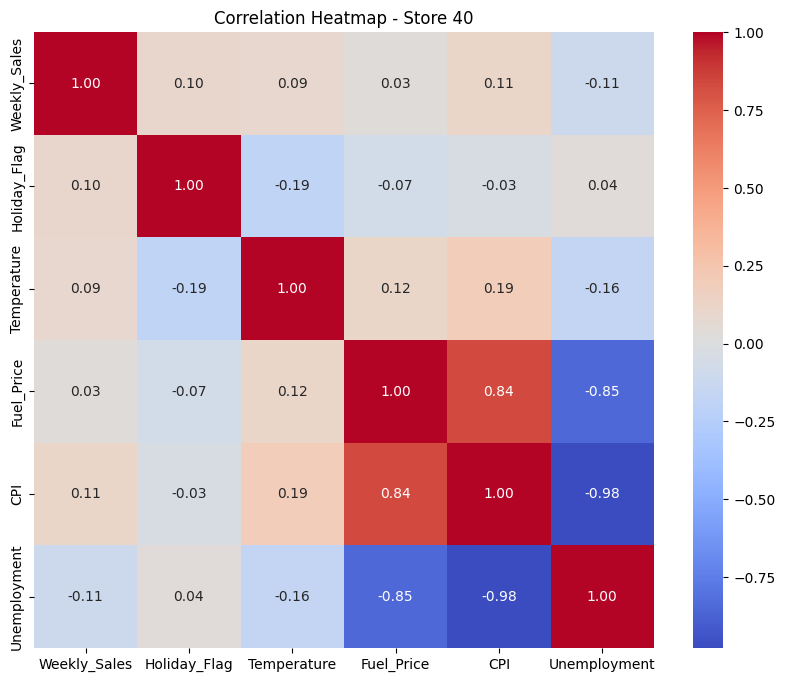

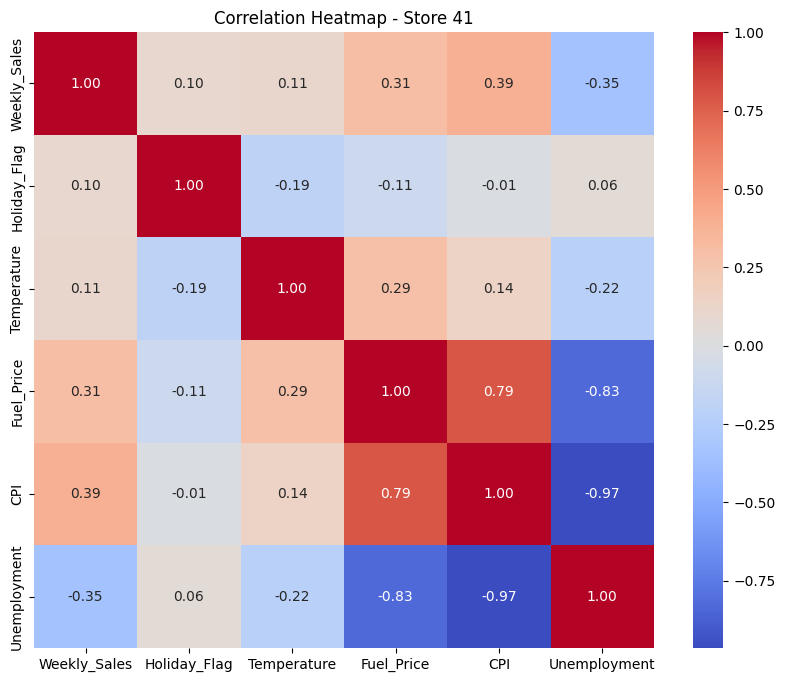

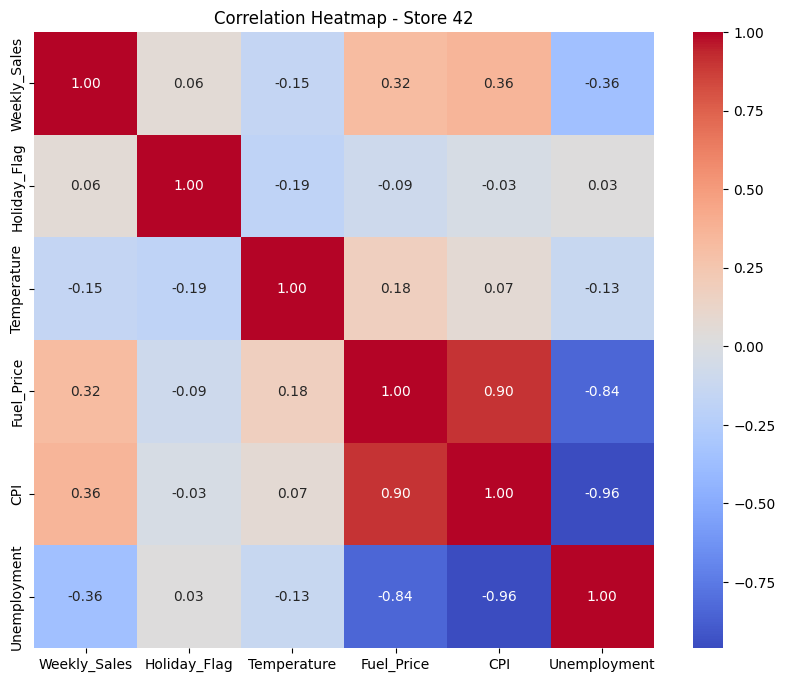

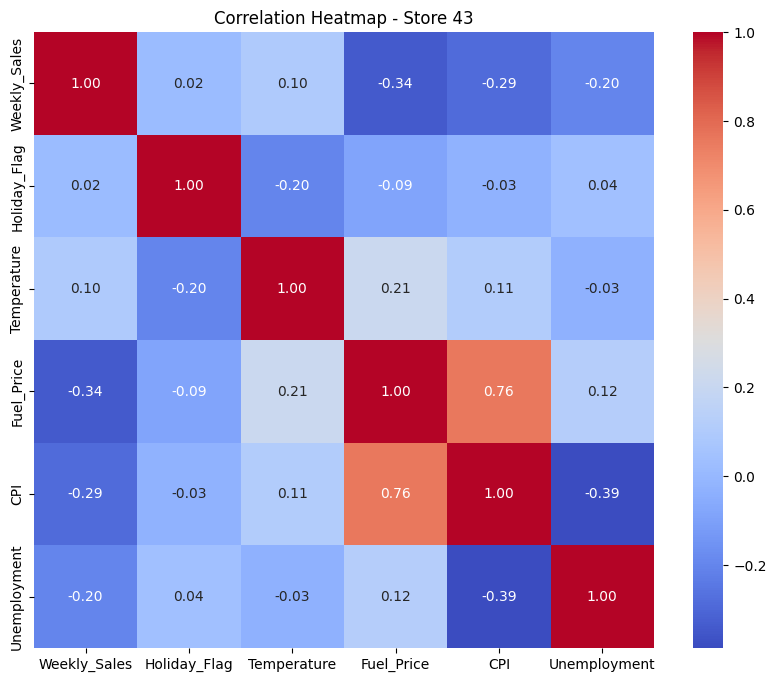

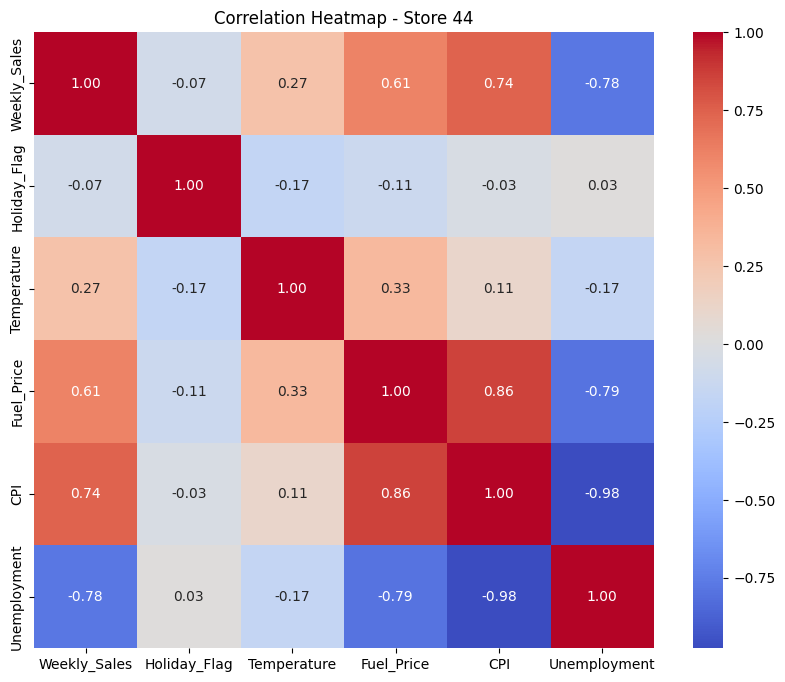

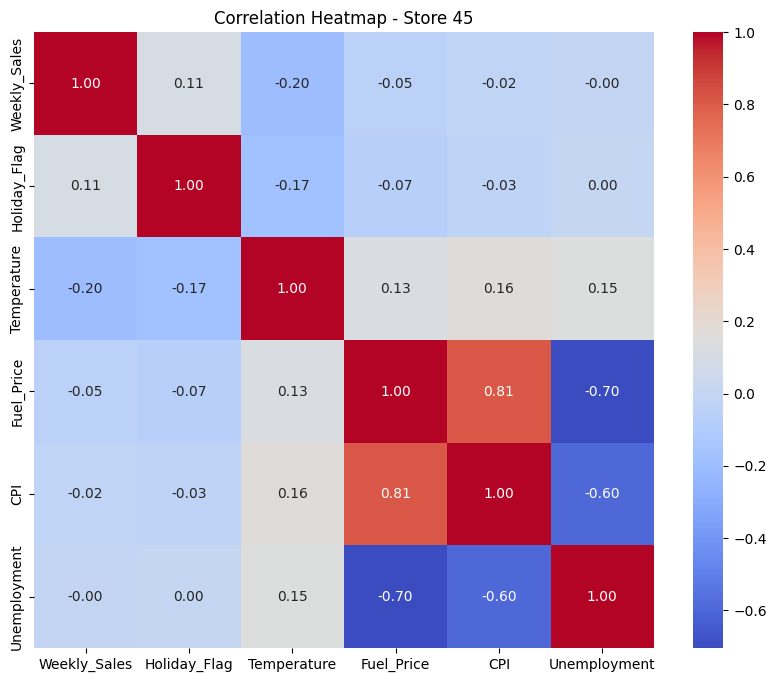

In [11]:
import seaborn as sns

# Calculate the correlation matrix for each store
for store_number, data in store_data.items():
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap - Store {store_number}")
    plt.show()


In [ ]:
#Holiday vs. Non-Holiday Analysis: Analyzing the effect of holidays on weekly sales by comparing the sales behavior on holiday weeks to non-holiday weeks for each store. Ploting the average sales for both categories and comparing them.

In [12]:
# Calculate average sales for holiday and non-holiday weeks for each store
for store_number, data in store_data.items():
    holiday_sales = data[data['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
    non_holiday_sales = data[data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
    print(f"Store {store_number} - Average Sales on Holiday Weeks: {holiday_sales:.2f}")
    print(f"Store {store_number} - Average Sales on Non-Holiday Weeks: {non_holiday_sales:.2f}")


Store 1 - Average Sales on Holiday Weeks: 1665747.66
Store 1 - Average Sales on Non-Holiday Weeks: 1546957.39
Store 2 - Average Sales on Holiday Weeks: 2079266.90
Store 2 - Average Sales on Non-Holiday Weeks: 1914208.81
Store 3 - Average Sales on Holiday Weeks: 437811.05
Store 3 - Average Sales on Non-Holiday Weeks: 400064.85
Store 4 - Average Sales on Holiday Weeks: 2243102.62
Store 4 - Average Sales on Non-Holiday Weeks: 2083555.84
Store 5 - Average Sales on Holiday Weeks: 359501.61
Store 5 - Average Sales on Non-Holiday Weeks: 314892.28
Store 6 - Average Sales on Holiday Weeks: 1680907.93
Store 6 - Average Sales on Non-Holiday Weeks: 1555992.87
Store 7 - Average Sales on Holiday Weeks: 672400.26
Store 7 - Average Sales on Non-Holiday Weeks: 562964.45
Store 8 - Average Sales on Holiday Weeks: 975330.86
Store 8 - Average Sales on Non-Holiday Weeks: 903743.40
Store 9 - Average Sales on Holiday Weeks: 588950.82
Store 9 - Average Sales on Non-Holiday Weeks: 540599.33
Store 10 - Average S

In [ ]:
#Holiday Impact on Sales

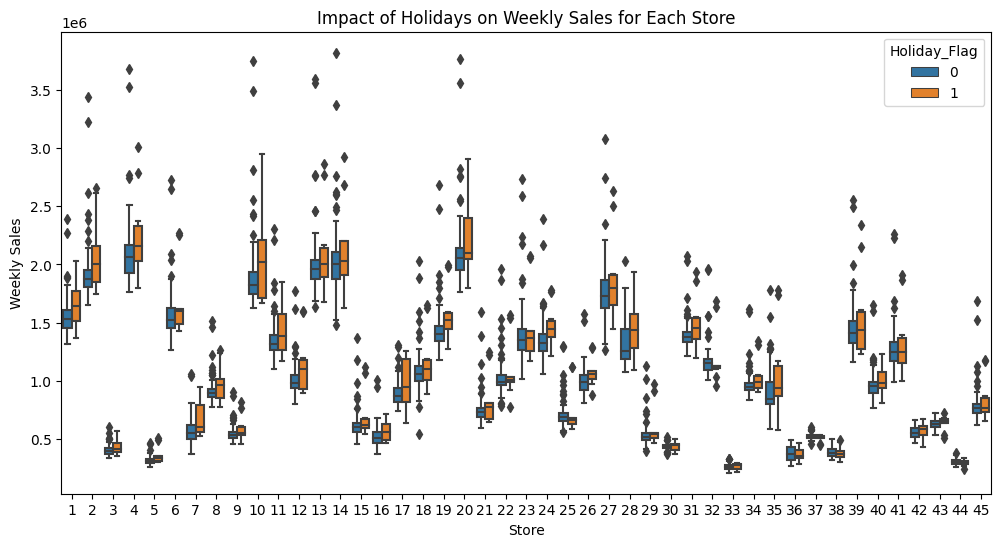

In [13]:
# Box plot to compare sales during holiday weeks and non-holiday weeks for each store
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag', data=application_df)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Impact of Holidays on Weekly Sales for Each Store')
plt.show()


In [ ]:
#The plot displays two sets of boxes for each store, one for holiday weeks and another for non-holiday weeks.
#The boxes show the distribution of weekly sales values for each category (holiday and non-holiday) within each store.
#The horizontal line inside each box represents the median (50th percentile) of the sales for the corresponding category (holiday or non-holiday).

In [ ]:
#Time Series Analysis

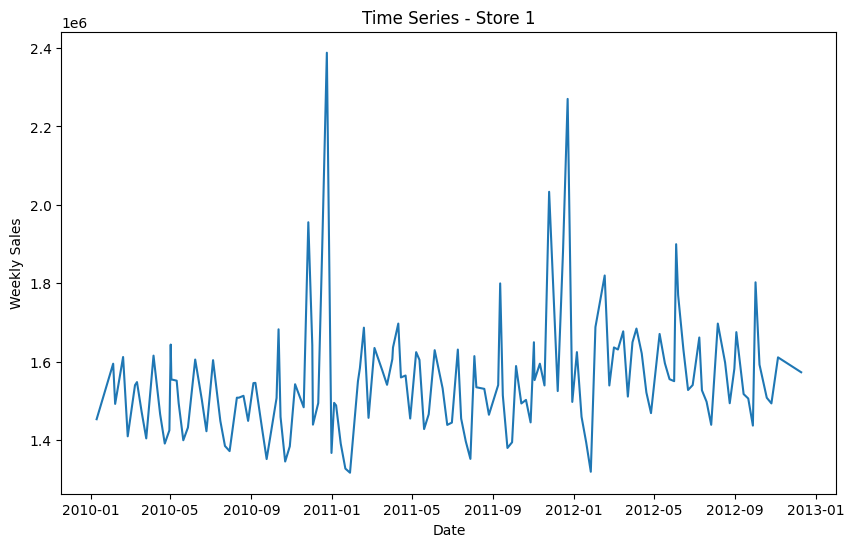

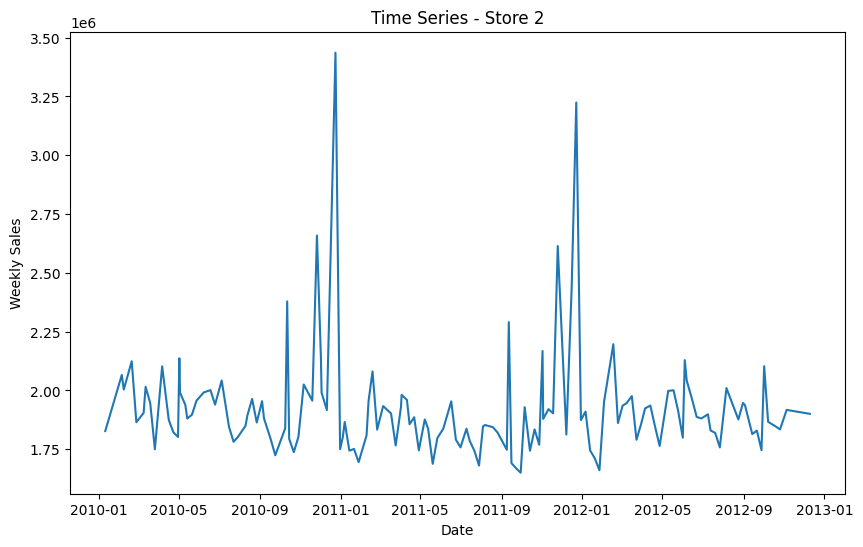

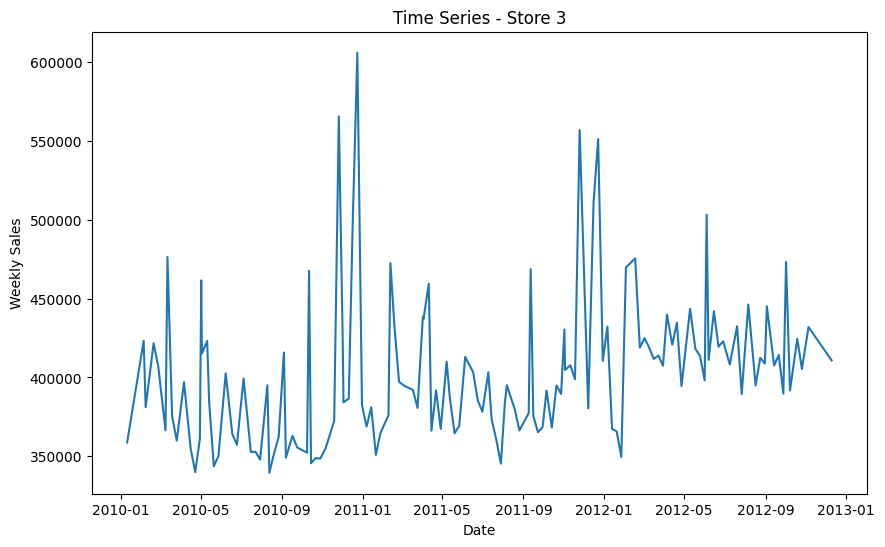

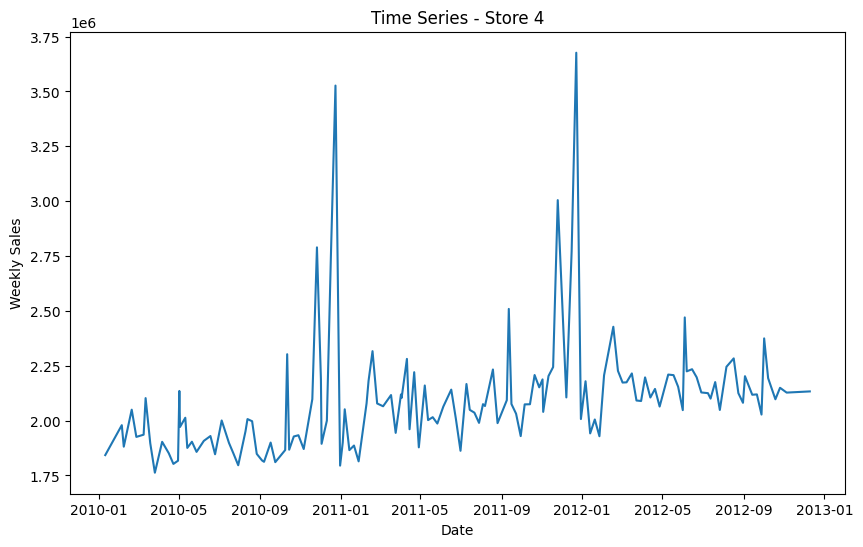

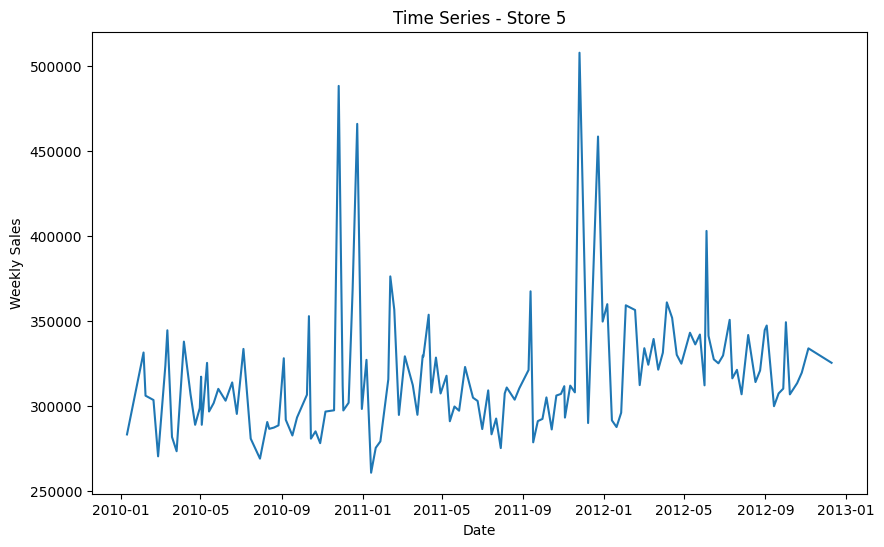

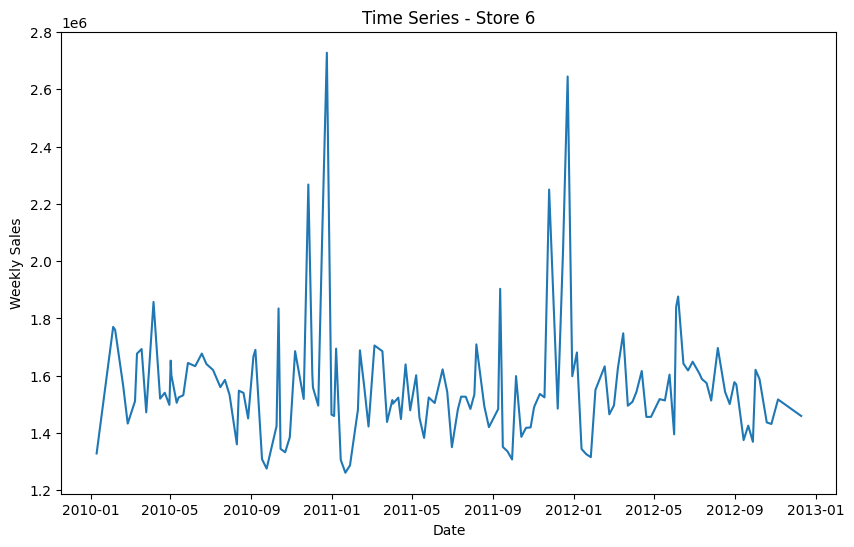

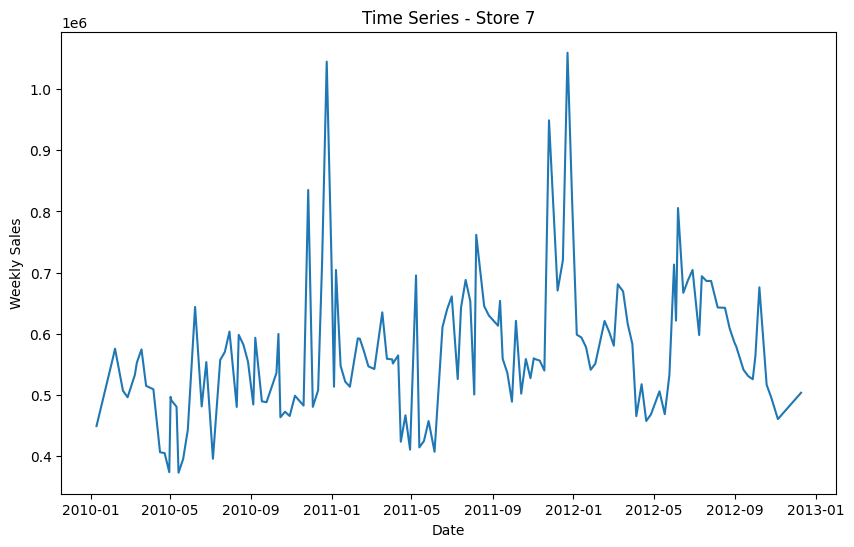

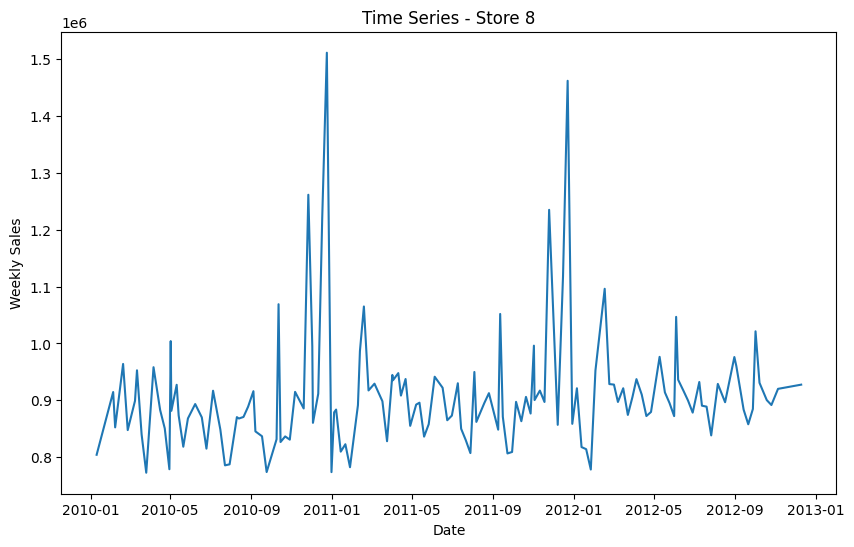

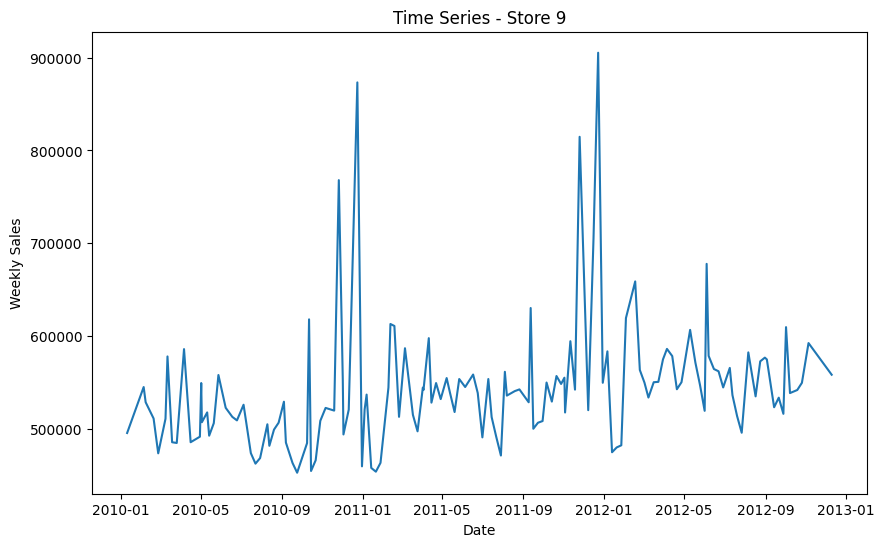

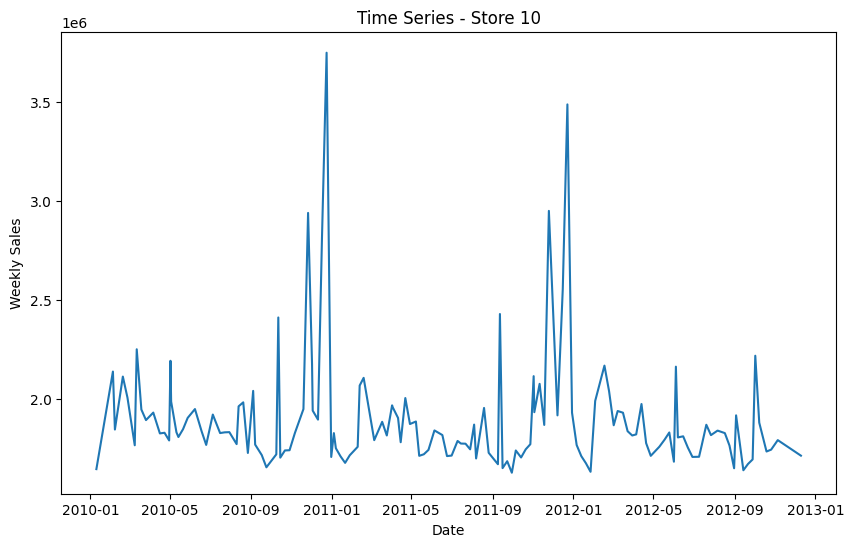

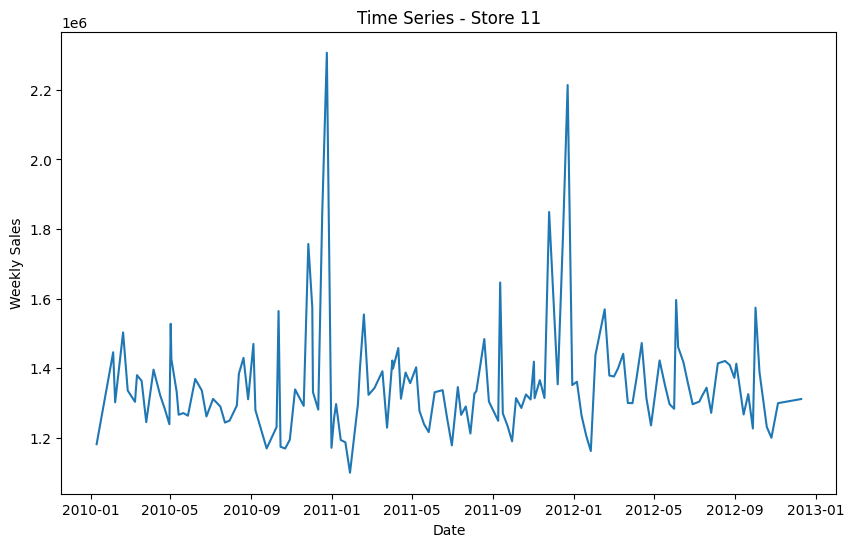

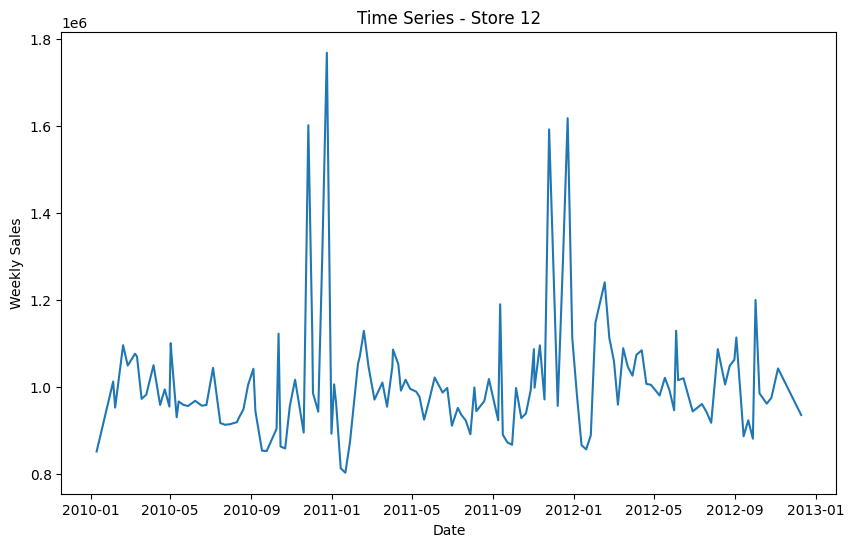

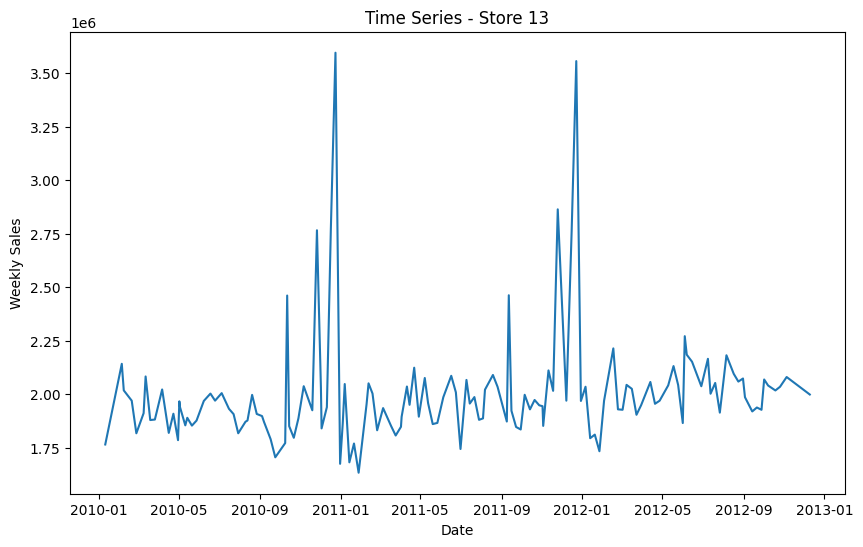

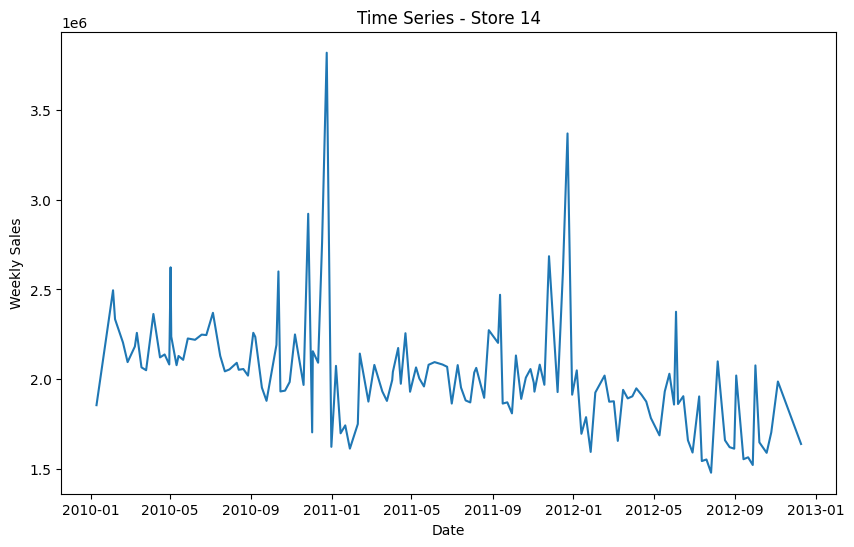

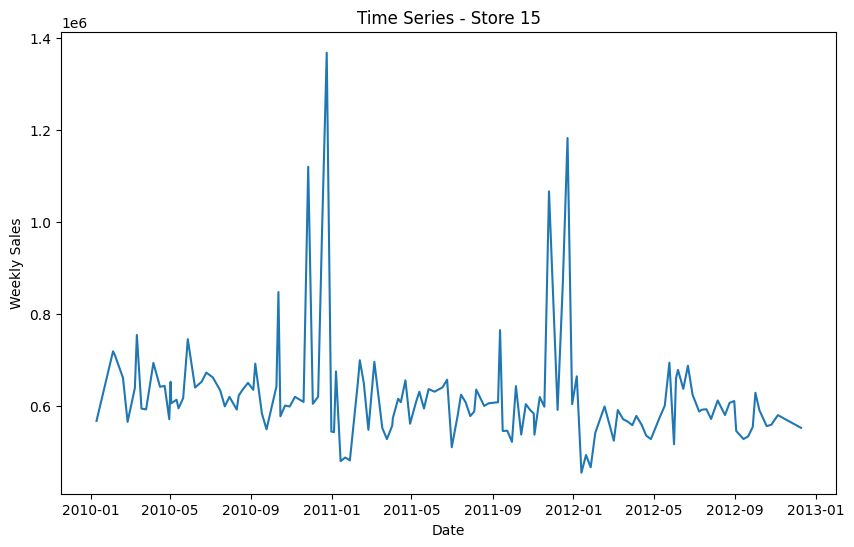

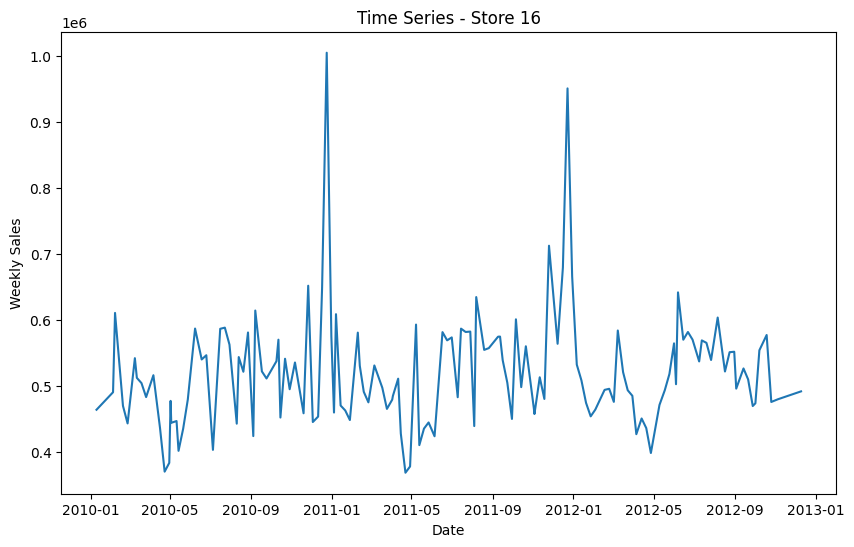

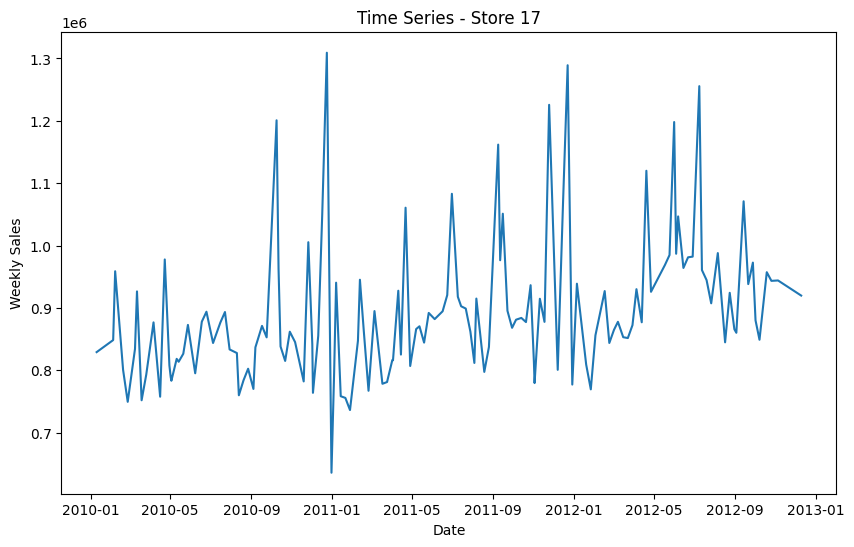

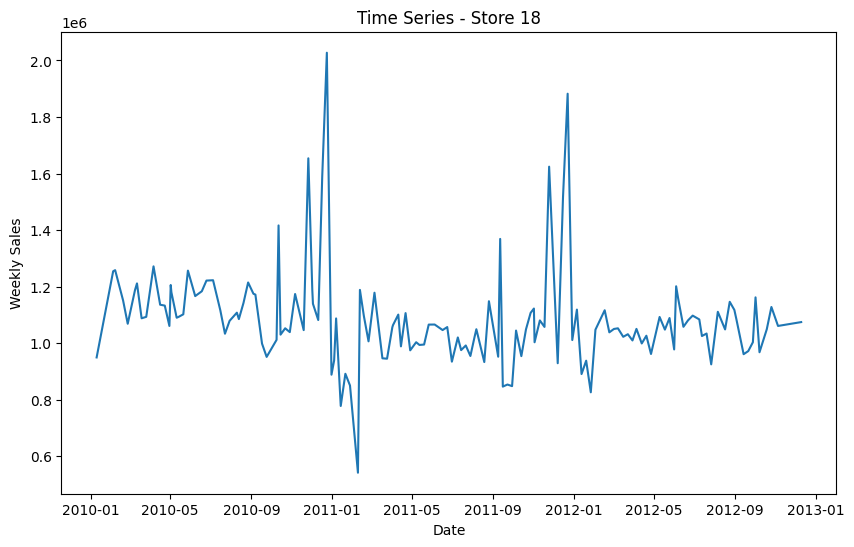

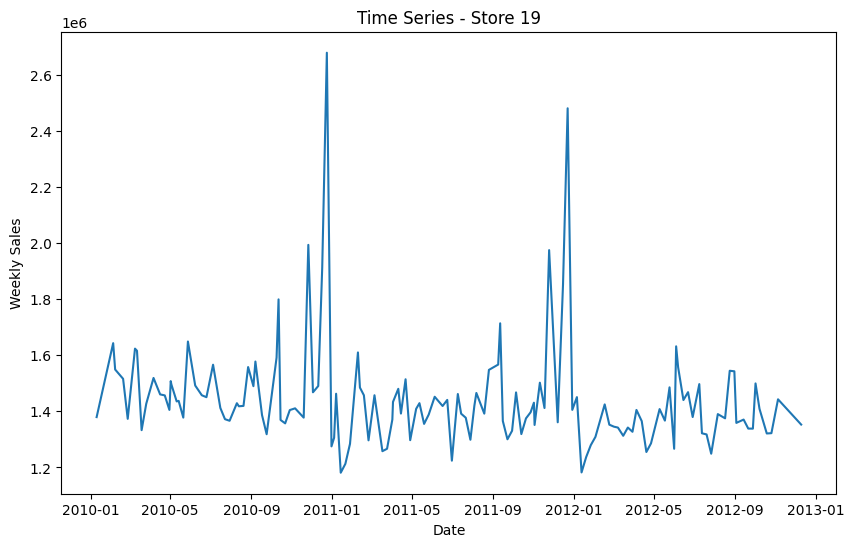

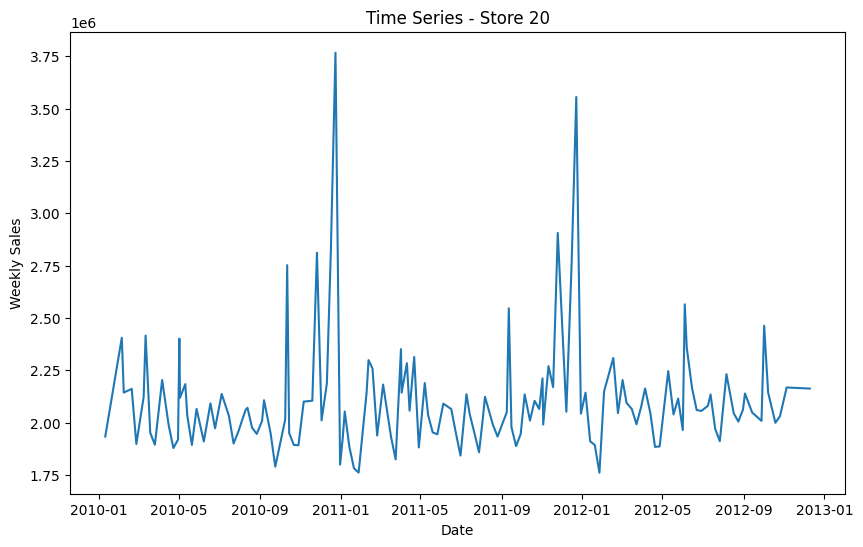

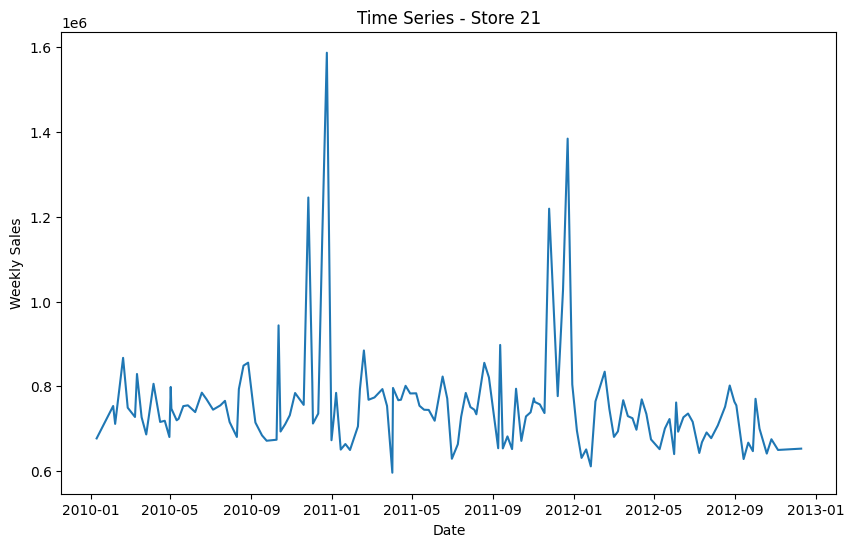

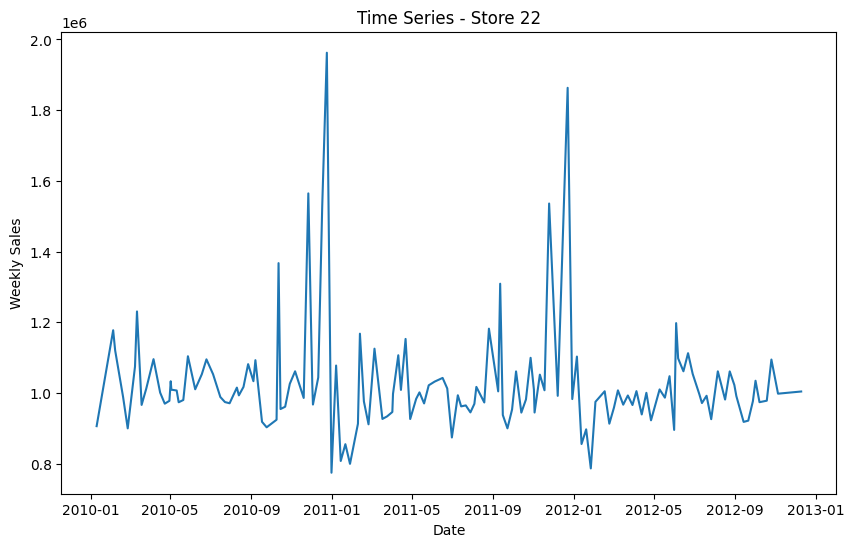

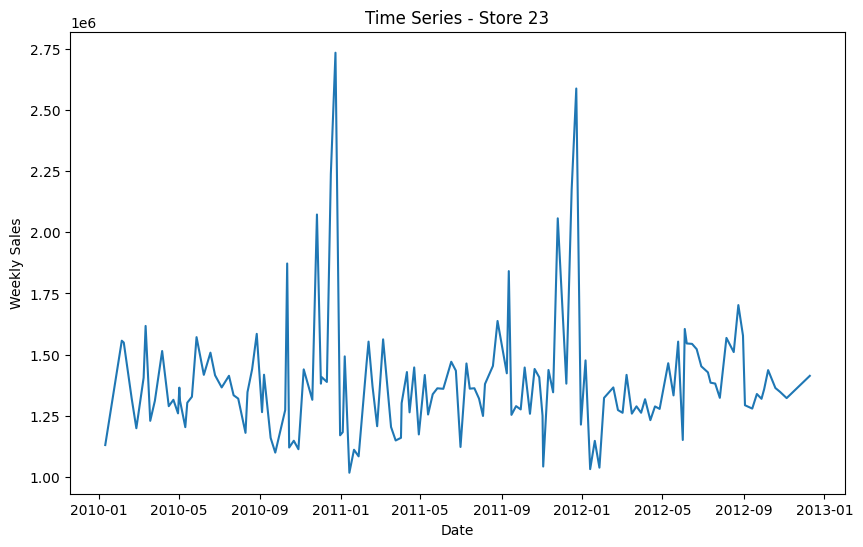

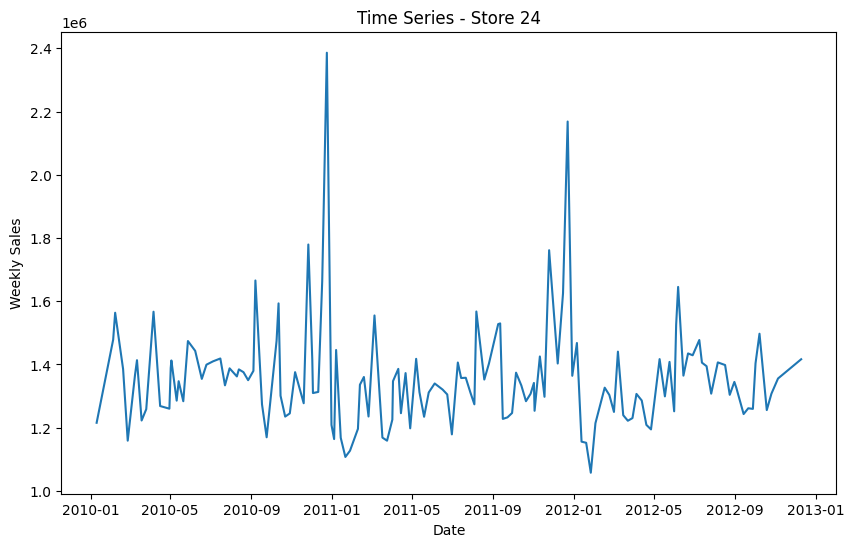

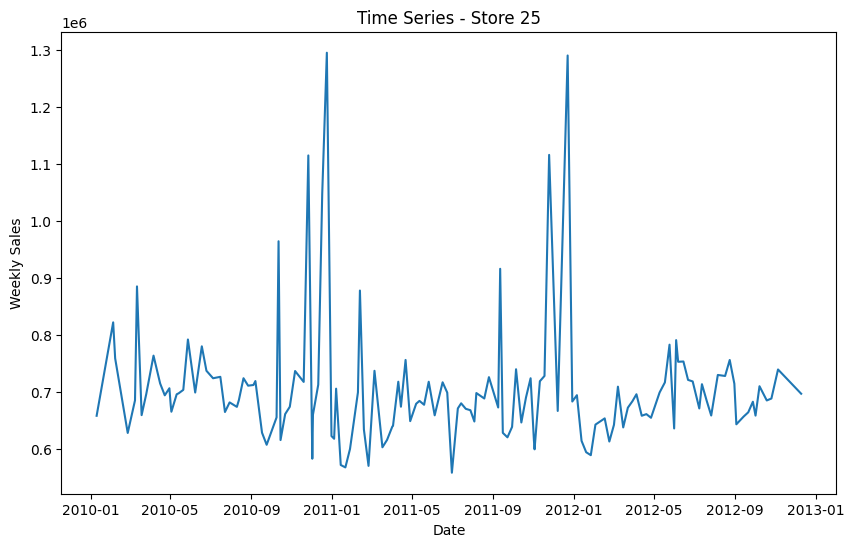

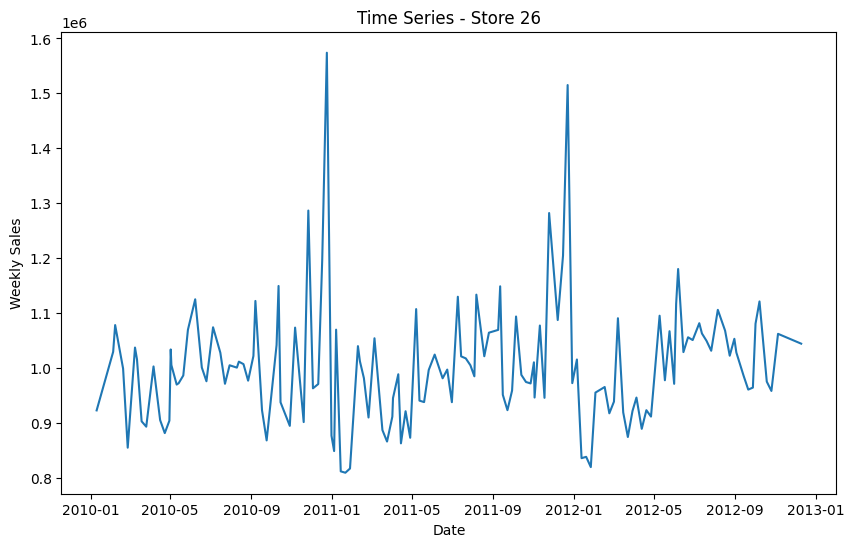

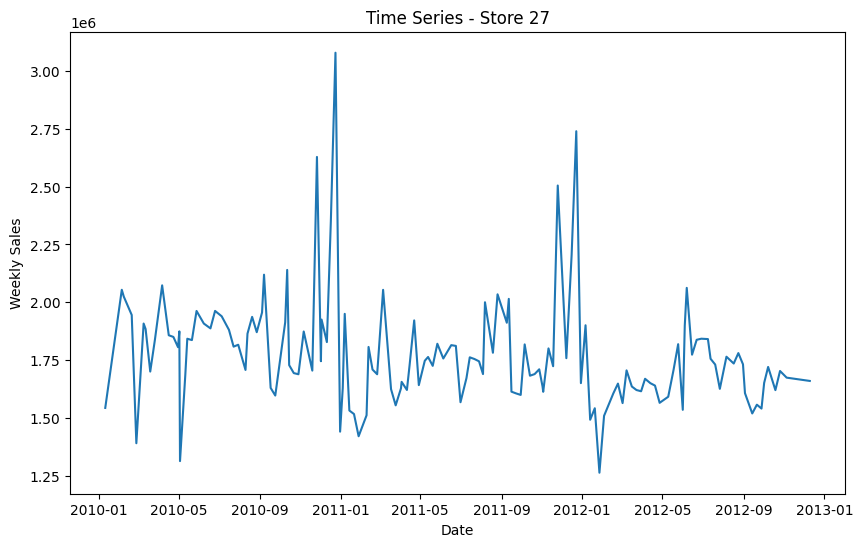

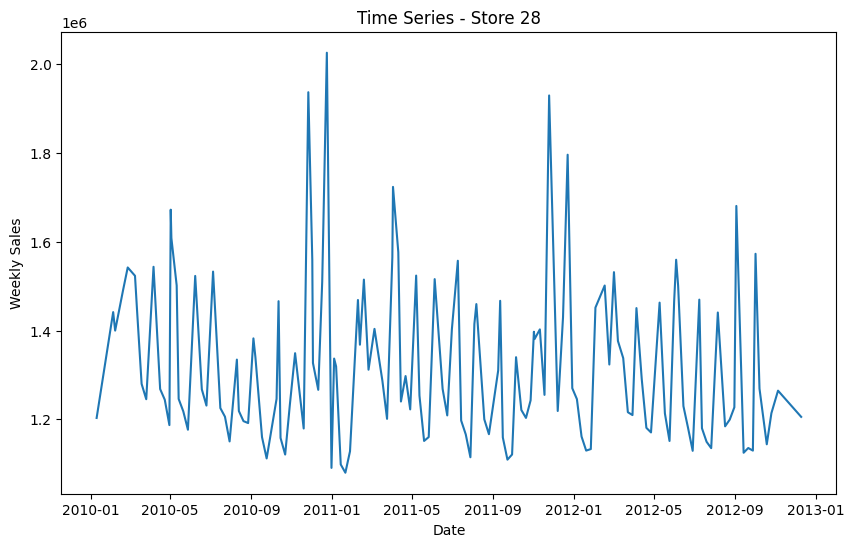

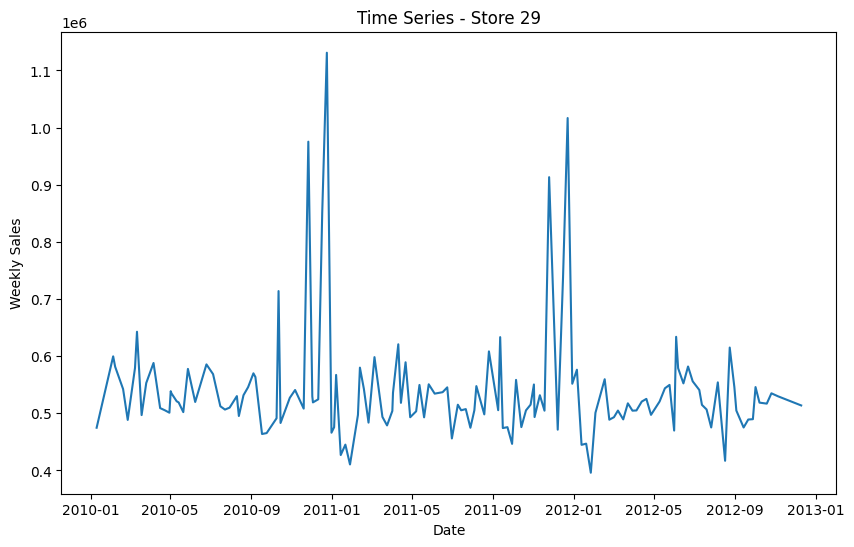

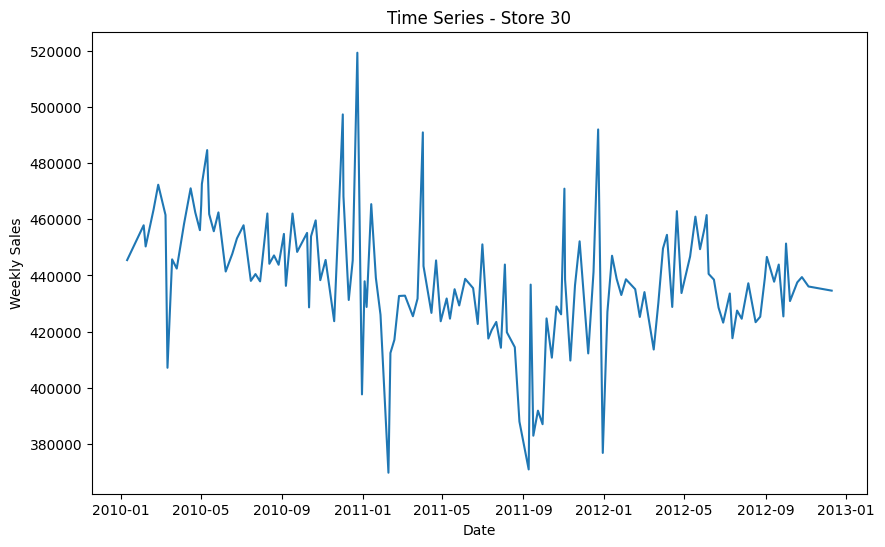

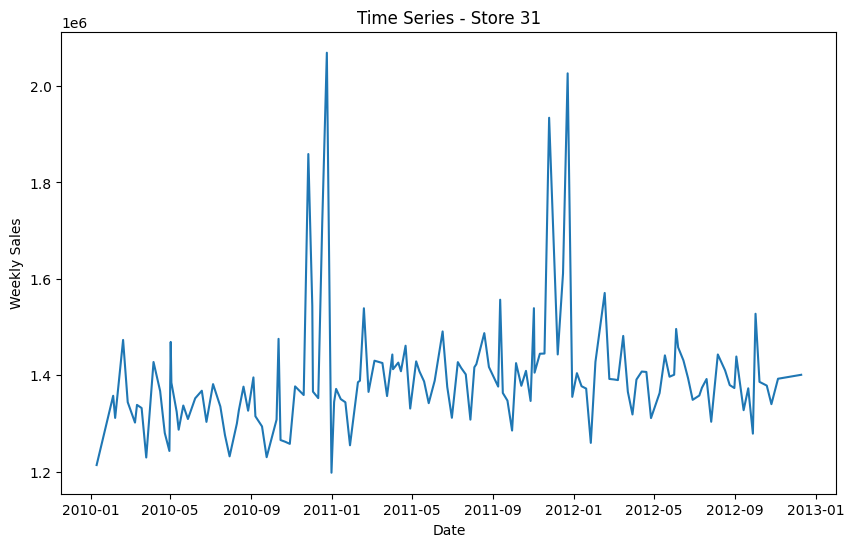

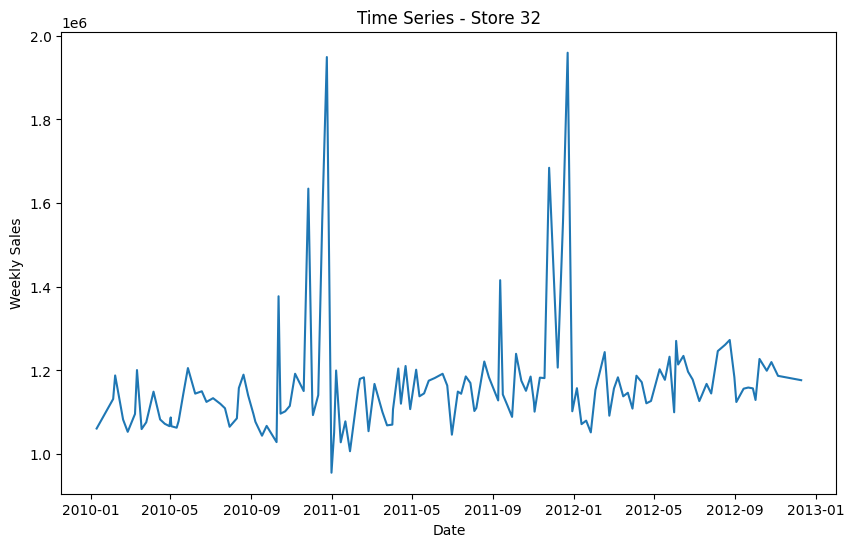

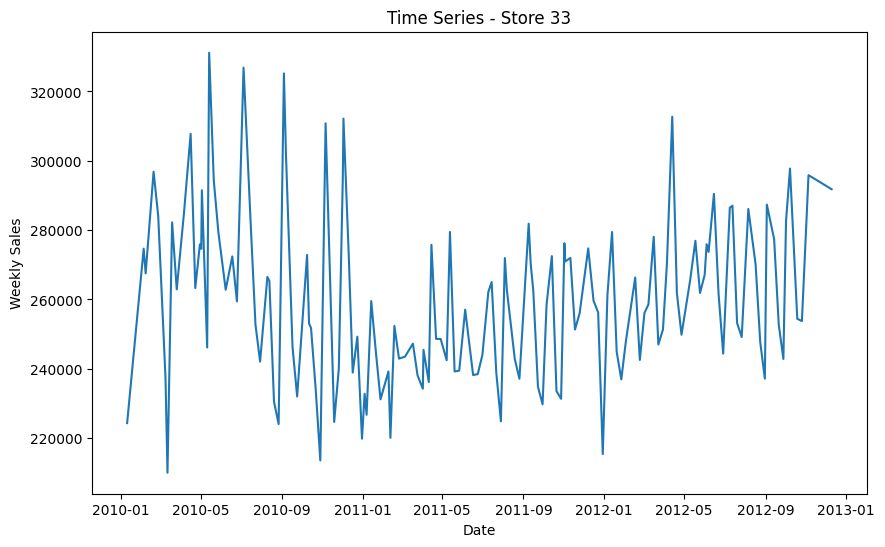

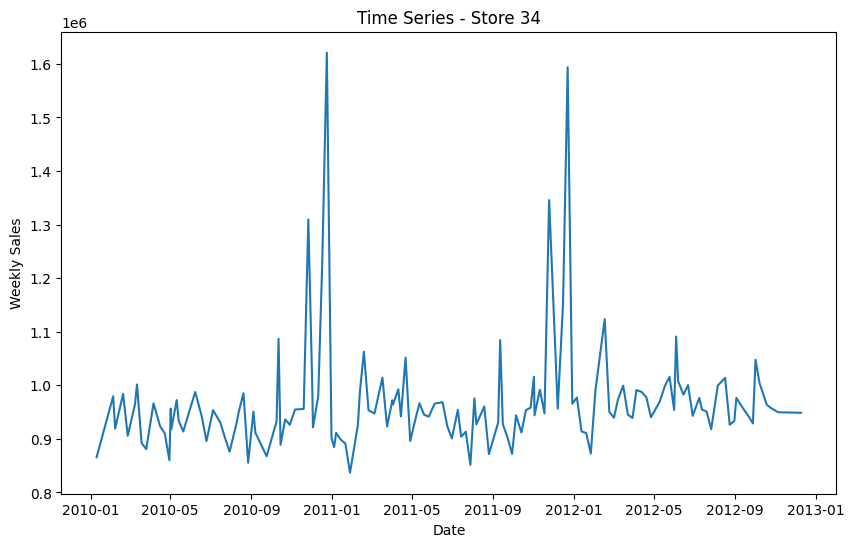

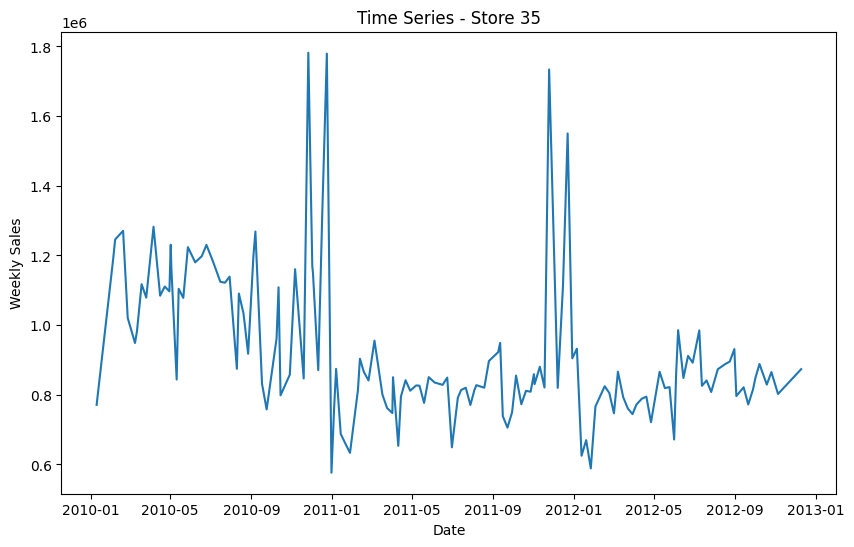

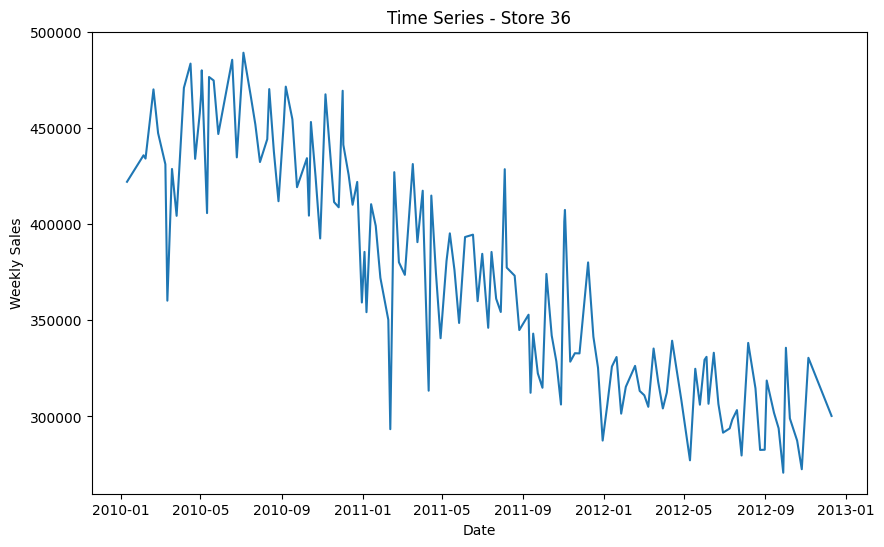

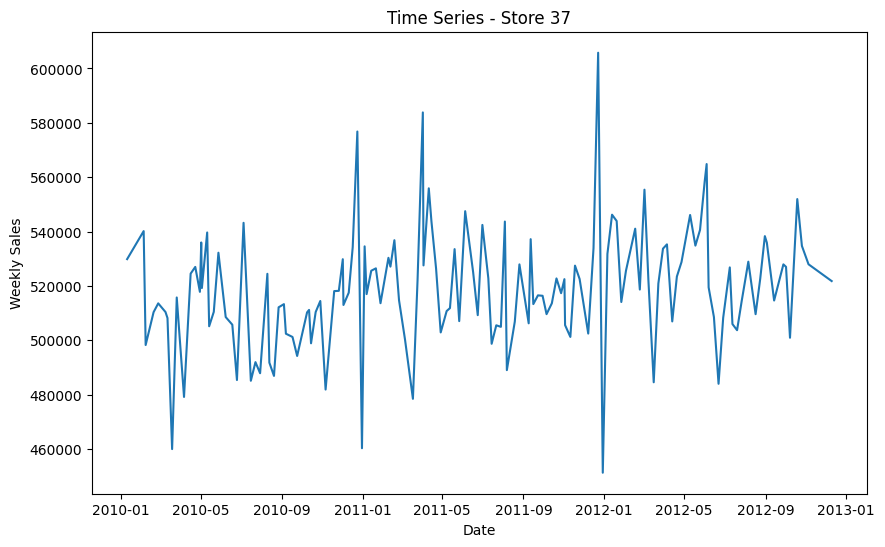

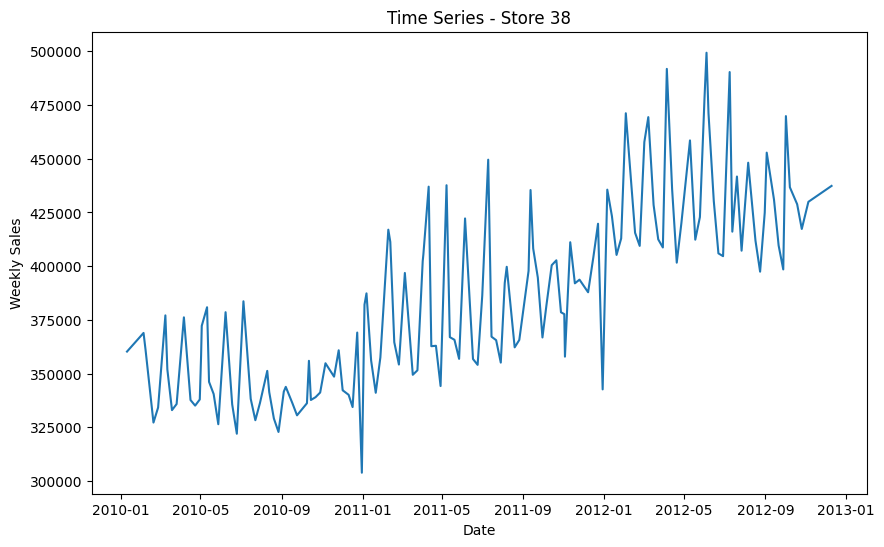

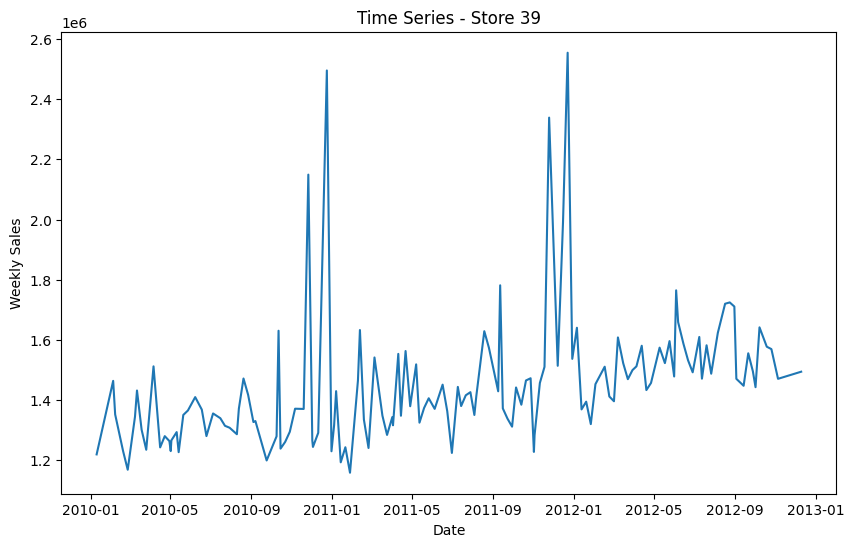

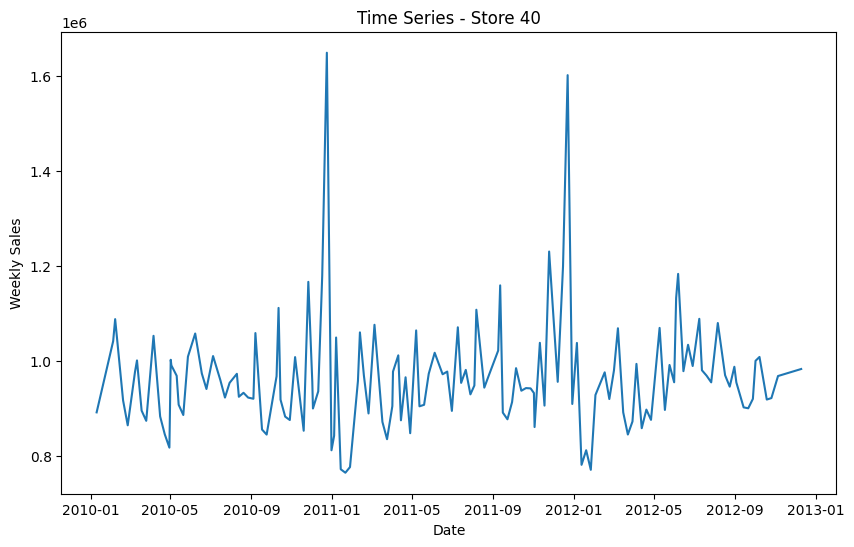

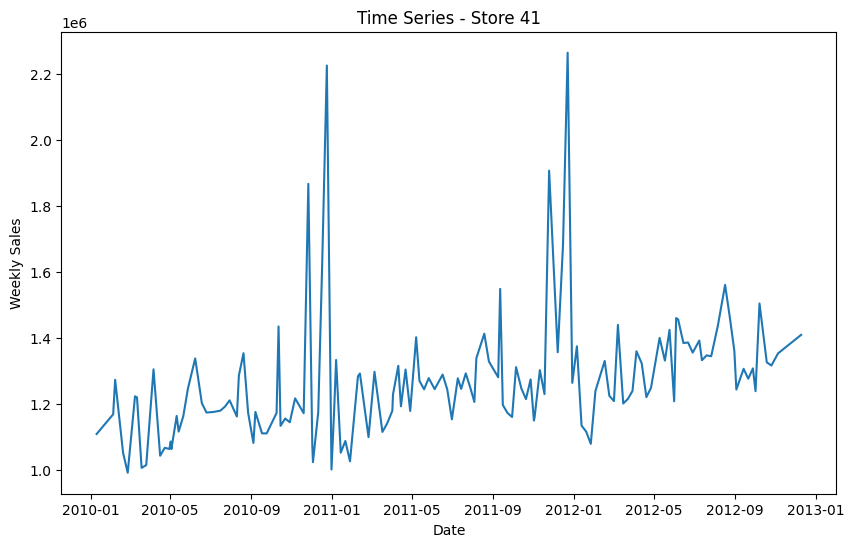

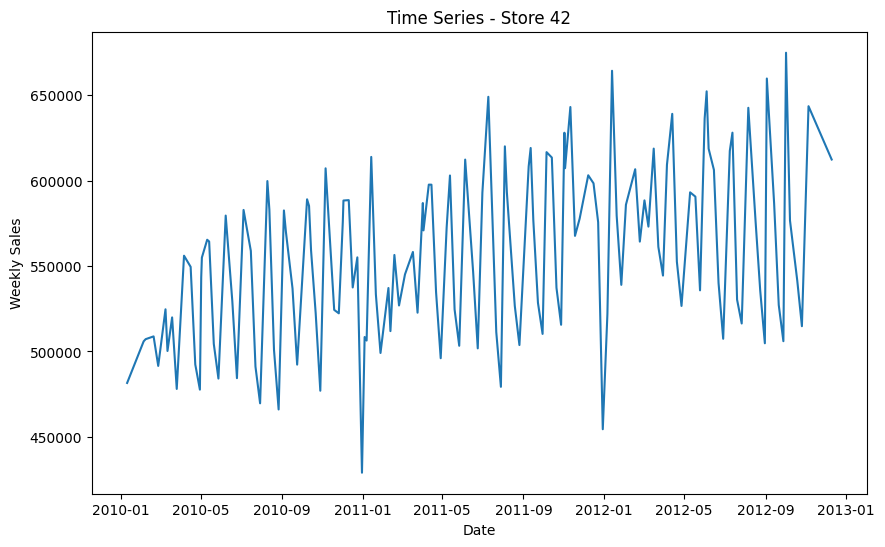

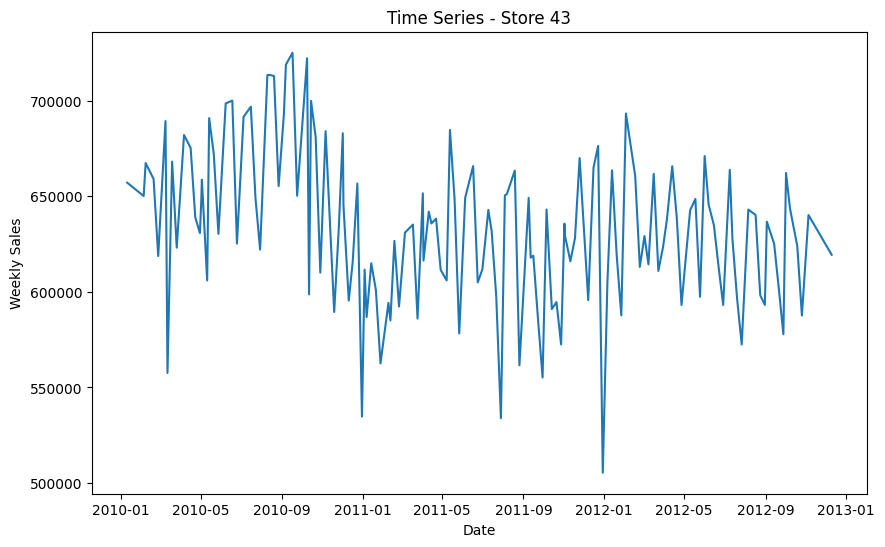

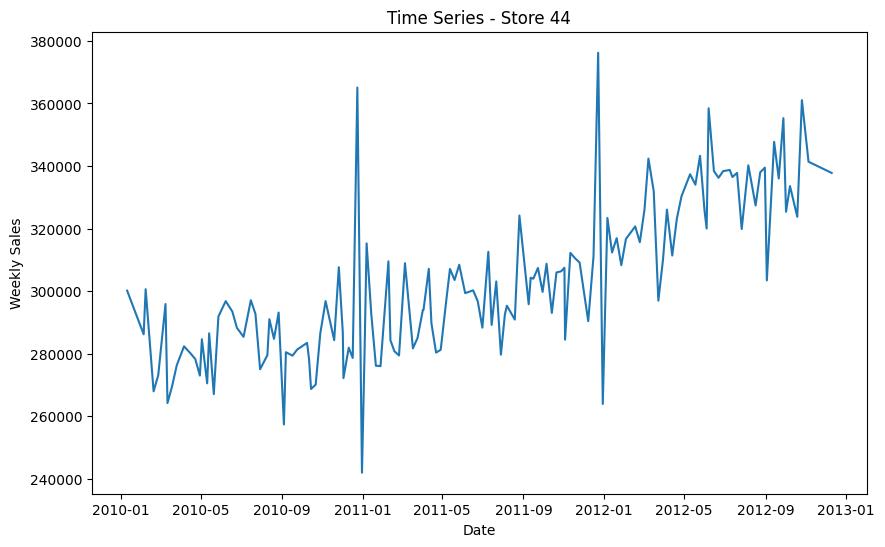

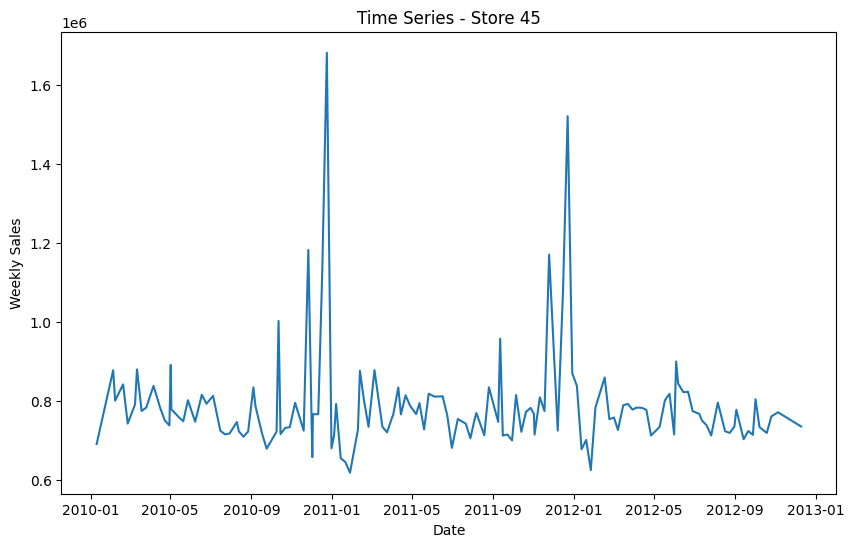

In [14]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
application_df['Date'] = pd.to_datetime(application_df['Date'])

# Sort the data by date
application_df.sort_values(by='Date', inplace=True)

# Plot time series of weekly sales for each store
for store_number, data in application_df.groupby('Store'):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Weekly_Sales'])
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title(f'Time Series - Store {store_number}')
    plt.show()


In [ ]:
#Each plot represents the time series of weekly sales for a specific store.These time series plots are useful for observing trends, seasonality, and any patterns or fluctuations in weekly sales for each store over time.

In [ ]:
#Pair Plots:helps to quickly identify patterns, correlations, and potential relationships between numerical features.

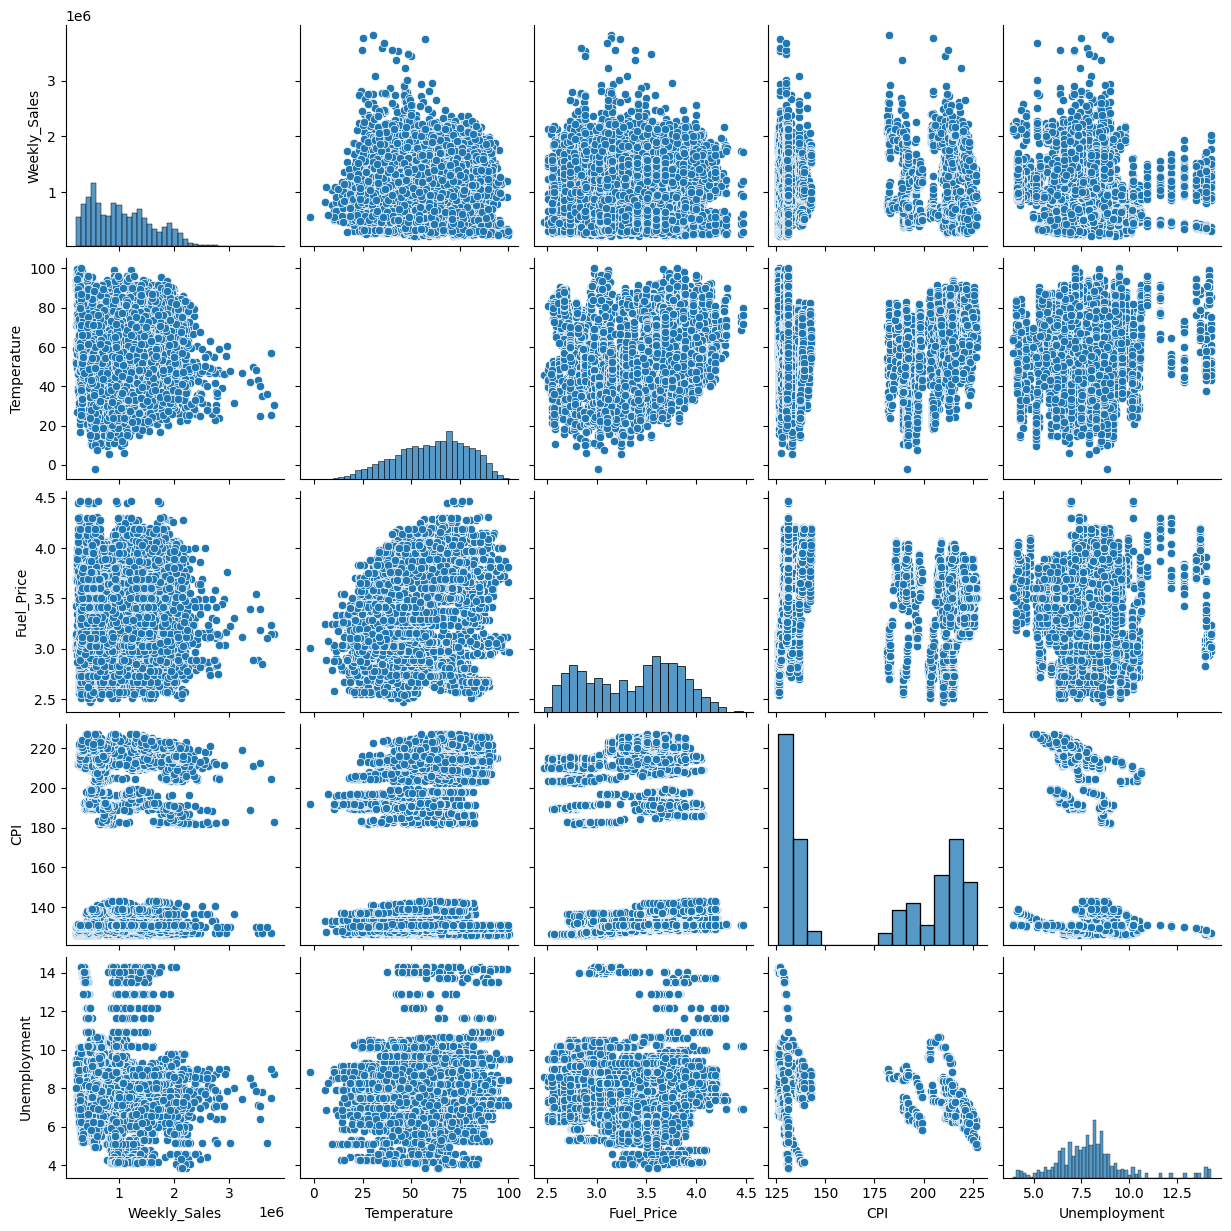

In [16]:
import seaborn as sns

# Create a subset of the data for pair plots
pairplot_data = application_df.drop(['Store', 'Date', 'Holiday_Flag'], axis=1)

# Pair plot to visualize relationships between numerical features
sns.pairplot(pairplot_data)
plt.show()


In [ ]:
#Positive Correlation: If the points in a scatter plot show an upward trend (from the bottom-left to the top-right), it indicates a positive correlation between the two features. As one feature increases, the other tends to increase as well.

#Negative Correlation: If the points in a scatter plot show a downward trend (from the top-left to the bottom-right), it indicates a negative correlation between the two features. As one feature increases, the other tends to decrease.

#No Correlation: If the points in a scatter plot are scattered around randomly with no apparent pattern, it suggests that there is no significant linear relationship between the two features.